# 1. Library

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 11044795741915595549, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 16183459840
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 8764238658432040356
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

In [ ]:
!pip install q tensorflow-gpu==2.2.0

In [ ]:
!pip install -q keras

In [2]:
!pip install tensorflow_addons

     |████████████████████████████████| 1.1 MB 13.6 MB/s 


In [3]:
#Importing the necessary modules 
import tensorflow as tf
import tensorflow.keras as keras
%env SM_FRAMEWORK=tf.keras
#import segmentation_models as sm #https://segmentation-models.readthedocs.io/en/latest/tutorial.html
#sm.set_framework('tf.keras')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2
from tqdm import tqdm_notebook as tqdm 
#from tqdm.notebook import tqdm
import joblib 
import math
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from imageio import imread
import imageio
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, UpSampling2D, Lambda, AveragePooling2D, Flatten, Dense, TimeDistributed
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow_addons as tfa
import datetime
from sklearn import metrics
from keras import backend as K

env: SM_FRAMEWORK=tf.keras


In [ ]:
f"Tensorflow version = {tf.__version__}"

'Tensorflow version = 2.5.0'

In [ ]:
#IEEE
train_data_1=pd.read_csv('/content/drive/MyDrive/LUAN-VAN/IFSM/Training_Data/IEEE/data_agumented/train_data.csv', index_col=0)
val_data_1=pd.read_csv('/content/drive/MyDrive/LUAN-VAN/IFSM/Validation_Data/IEEE/data_agumented/val_data.csv', index_col=0)
#CASIA2
train_data_2=pd.read_csv('/content/drive/MyDrive/LUAN-VAN/IFSM/Training_Data/CASIA2/data_agumented/train_data_fix.csv', index_col=0)
val_data_2=pd.read_csv('/content/drive/MyDrive/LUAN-VAN/IFSM/Validation_Data/CASIA2/data_agumented/val_data_fix.csv', index_col=0)

In [ ]:
display(train_data_2)

,X,y
0,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...
1,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...
2,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...
3,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...
4,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...
...,...,...
51228,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...
51229,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...
51230,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...
51231,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...,/content/drive/MyDrive/LUAN-VAN/IFSM/default.m...


In [ ]:
from sklearn.utils import shuffle

In [ ]:
train_data = pd.concat([train_data_2, train_data_1], ignore_index=True)
train_data = shuffle(train_data)
train_data = train_data.reset_index(drop=True)
display(train_data)

,X,y
0,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...
1,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...
2,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...
3,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...,/content/drive/MyDrive/LUAN-VAN/IFSM/default.m...
4,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...
...,...,...
55500,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...,/content/drive/MyDrive/LUAN-VAN/IFSM/default.m...
55501,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...,/content/drive/MyDrive/LUAN-VAN/IFSM/default.m...
55502,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...
55503,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...,/content/drive/MyDrive/LUAN-VAN/IFSM/default.m...


In [ ]:
#train_data.reset_index(inplace=True, drop=True)
display(train_data)

,X,y
0,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...
1,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...
2,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...
3,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...,/content/drive/MyDrive/LUAN-VAN/IFSM/default.m...
4,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...
...,...,...
55500,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...,/content/drive/MyDrive/LUAN-VAN/IFSM/default.m...
55501,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...,/content/drive/MyDrive/LUAN-VAN/IFSM/default.m...
55502,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...
55503,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...,/content/drive/MyDrive/LUAN-VAN/IFSM/default.m...


In [ ]:
train_data.to_csv('/content/drive/MyDrive/LUAN-VAN/IFSM/Training_Data/train_data_fix.csv',index=False)

In [4]:
train_data=pd.read_csv('/content/drive/MyDrive/LUAN-VAN/IFSM/Training_Data/train_data_fix_1.csv')

In [ ]:
train_data_1=pd.read_csv('/content/drive/MyDrive/LUAN-VAN/IFSM/Training_Data/train_data_fix_1.csv')

In [ ]:
val_data = pd.concat([val_data_1, val_data_2], ignore_index=True)
val_data = shuffle(val_data)
val_data = val_data.reset_index(drop=True)

In [ ]:
display(val_data)

,X,y
0,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...,/content/drive/MyDrive/LUAN-VAN/IFSM/default.m...
1,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...
2,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...
3,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...
4,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...,/content/drive/MyDrive/LUAN-VAN/IFSM/default.m...
...,...,...
23031,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...
23032,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...
23033,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...,/content/drive/MyDrive/LUAN-VAN/IFSM/default.m...
23034,/content/drive/MyDrive/LUAN-VAN/IFSM/Training_...,/content/drive/MyDrive/LUAN-VAN/IFSM/default.m...


In [ ]:
val_data.to_csv('/content/drive/MyDrive/LUAN-VAN/IFSM/Validation_Data/val_data_fix.csv',index=False)

In [5]:
val_data=pd.read_csv('/content/drive/MyDrive/LUAN-VAN/IFSM/Validation_Data/val_data_fix_1.csv')

In [ ]:
len(val_data)

23036

In [ ]:
len(train_data)

55505

#2. ResNet50


In [ ]:
batch_size=15
def train_gen():
    data = train_data.iloc[0:27750]
    #data_reduced = data[data['y']!='/content/drive/MyDrive/LUAN-VAN/IFSM/Data/default.mask.png']
    #count*batch_size*steps_train*epoch
    while True:
        for start in range(0, data.shape[0], batch_size):
            x_batch = []
            y_batch = []
            end = min(start + batch_size, data.shape[0])
            x_data_batch = data.iloc[start:end]
            
            for index,row in x_data_batch.iterrows():
                image = load_img(row['X'])
                image = img_to_array(image)
                if row['y'] !='/content/drive/MyDrive/LUAN-VAN/IFSM/default.mask.png':
                    label=[1, 0]
                else:
                    label=[0, 1]                                  
                x_batch.append(image)
                y_batch.append(label)
            
            x_batch = np.array(x_batch).reshape(-1, 512, 512, 3)/255
            y_batch = np.array(y_batch)

            yield x_batch, y_batch

def val_gen():
    data = val_data.iloc[0:15465]
    #data_reduced = data[data['y']!='/content/drive/MyDrive/LUAN-VAN/IFSM/Data/default.mask.png']
    #count*batch_size*steps_val*epoch
    while True:
        for start in range(0, data.shape[0], batch_size):
            x_batch = []
            y_batch = []
            end = min(start + batch_size, data.shape[0])
            x_data_batch = data.iloc[start:end]
            
            for index,row in x_data_batch.iterrows():
                image = load_img(row['X'])
                image = img_to_array(image)
                if row['y'] !='/content/drive/MyDrive/LUAN-VAN/IFSM/default.mask.png':
                    label=[1, 0]
                else:
                    label=[0, 1]
                x_batch.append(image)
                y_batch.append(label)
            
            x_batch = np.array(x_batch).reshape(-1, 512, 512, 3)/255
            y_batch = np.array(y_batch)

            yield x_batch, y_batch

def test_gen():
    data = test_data
    #data_reduced = data[data['y']!='/content/drive/MyDrive/LUAN-VAN/IFSM/Data/default.mask.png']
    while True:
        for start in range(0, data.shape[0], batch_size):
            x_batch = []
            y_batch = []
            end = min(start + batch_size, data.shape[0])
            x_data_batch = data.iloc[start:end]
            
            for index,row in x_data_batch.iterrows():
                image = load_img(row['X'])
                image = img_to_array(image)
                if row['y'] !='/content/drive/MyDrive/LUAN-VAN/IFSM/default.mask.png':
                    label=[1, 0]
                else:
                    label=[0, 1] 
                x_batch.append(image)
                y_batch.append(label)
            
            x_batch = np.array(x_batch).reshape(-1, 512, 512, 3)/255
            y_batch = np.array(y_batch)

            yield x_batch, y_batch

In [ ]:
train_data_gen = tf.data.Dataset.from_generator(train_gen, output_types=(tf.float32, tf.int32),output_shapes=((batch_size,512,512,3), (batch_size,2)))
val_data_gen = tf.data.Dataset.from_generator(val_gen, output_types=(tf.float32, tf.int32),output_shapes=((batch_size,512,512,3), (batch_size,2)))
test_data_gen = tf.data.Dataset.from_generator(test_gen, output_types=(tf.int32),output_shapes=(batch_size,2))

In [ ]:
print(f"Batch size and shape of input generator {list(train_data_gen.take(3).as_numpy_iterator())[0][0].shape}")
print(f"Batch size and shape of output generator {list(train_data_gen.take(3).as_numpy_iterator())[0][1].shape}")

Batch size and shape of input generator (8, 512, 512, 3)
Batch size and shape of output generator (8, 2)


In [ ]:
resnet50=ResNet50(weights='imagenet', include_top=False, input_shape=(512, 512, 3))
resnet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 518, 518, 3)  0           input_9[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 256, 256, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 256, 256, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
import numpy as np
from keras.applications.resnet50 import ResNet50
from keras.models import load_model
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, AveragePooling2D
from keras import optimizers

# load ResNet50
resnet50=ResNet50(weights='imagenet', include_top=False, input_shape=(512, 512, 3))

b1 = resnet50.get_layer('conv5_block3_out').output  #16x16x2048

c1 = AveragePooling2D(pool_size=(16, 16), input_shape=(16,16,2048))(b1)
c2 = Flatten(input_shape=(1, 1, 2048))(c1)
output1 = Dense(2, activation='softmax')(c2)
	
ResNet50_model= Model(resnet50.input, output1)
for layer in ResNet50_model.layers[0:171]:
  layer.trainable=False
ResNet50_model.load_weights('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/Weights/ressnet50_model_adam_weights_33.h5')
ResNet50_model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-4), metrics=['categorical_accuracy'])

print(ResNet50_model.summary())

#history =model_aug.fit(train_gen(), steps_per_epoch=1024, epochs=2, validation_data= val_gen(), validation_steps=512, callbacks=callbacks_list)
#model_aug.save_weights('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/Weights/ressnet50_model_adam_weights_24.h5')

94773248/94765736 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 518, 518, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 256, 256, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 256, 256, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
#2
for i in range(20):
  history =ResNet50_model.fit(train_data_gen, steps_per_epoch=1850, epochs=1, validation_data= val_data_gen, validation_steps=1031, callbacks=callbacks_list)
  ResNet50_model.save_weights('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/Weights/ressnet50_model_adam_weights_'+str(40+i)+'.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


 864/1850 [=============>................] - ETA: 4:57 - loss: 0.6222 - categorical_accuracy: 0.6546

In [ ]:
model_aug.save_weights('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/Weights/ressnet50_model_adam_weights_0.h5')

In [ ]:
len(val_data)

23036

In [ ]:

checkPoint_path = "/content/drive/MyDrive/LUAN-VAN/IFSM/model_checkpoints/model_pre_trained_resnet50_classification/"

filepath= checkPoint_path+"weights-improvement-{epoch:02d}-{val_categorical_accuracy:.2f}.ckpt"

checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_categorical_accuracy', verbose=1,save_best_only=True,save_weights_only=True, mode='max')

tensorboard_log_dir = "/content/drive/MyDrive/LUAN-VAN/IFSM/logs/model_pre_trained_resnet50" 
tensorboard_path = os.path.join("logs",tensorboard_log_dir)

tensorboard_callback = TensorBoard(log_dir=tensorboard_path, histogram_freq=3)

callbacks_list = [
    checkpoint,
    tensorboard_callback]

In [ ]:
ResNet50_model.save('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/model_resnet50_classification')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /content/drive/MyDrive/LUAN-VAN/IFSM/Model/model_resnet50_classification/assets


In [ ]:
model_aug=tf.keras.models.load_model('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/model_resnet50_classification')

In [ ]:
model_aug.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-5), metrics=[tfa.metrics.F1Score(num_classes=2,average="micro",threshold=0.5), 'categorical_accuracy'])

In [ ]:
#IEEE
test_data=pd.read_csv('/content/drive/MyDrive/LUAN-VAN/IFSM/Testing_Data/IEEE/data_agumented/test_data.csv')

In [ ]:
#CASIA1
test_data=pd.read_csv('/content/drive/MyDrive/LUAN-VAN/IFSM/Testing_Data/CASIA1/data_agumented/test_data.csv')

In [ ]:
#COVERAGE
test_data=pd.read_csv('/content/drive/MyDrive/LUAN-VAN/IFSM/Testing_Data/COVERAGE/data_agumented/test_data.csv')

In [ ]:
#COLUMBIA
test_data=pd.read_csv('/content/drive/MyDrive/LUAN-VAN/IFSM/Testing_Data/COLUMBIA/data_agumented/test_data.csv')

In [ ]:
len(test_data)

1719

In [ ]:
def test_gen1():
    data = test_data.iloc[0:195]
    #data_reduced = data[data['y']!='/content/drive/MyDrive/LUAN-VAN/IFSM/Data/default.mask.png']
    x_test = []
    y1_test = []
    y2_test = []
    for index,row in tqdm(data.iterrows()):
        image = imread(row['X'])
        image = img_to_array(image)
        mask = imread(row['y'])
        mask= img_to_array(mask,dtype=np.uint8)
        if row['y'] !='/content/drive/MyDrive/LUAN-VAN/IFSM/default.mask.png':
            label=[1, 0]
        else:
            label=[0, 1]                                  
        x_test.append(image)
        y1_test.append(label)
        y2_test.append(mask)
    y1_test = np.array(y1_test)
    return y1_test

##IEEE

In [ ]:

preds=(ResNet50_model.predict_generator(test_gen(), steps=int(len(test_data)//15), verbose=1)>0.5).astype("int32") 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


89/89 [==============================] - 572s 6s/step


In [ ]:
len(preds)

1335

In [ ]:

metric = tfa.metrics.MultiLabelConfusionMatrix(num_classes=2)
metric.update_state(test_gen1(), preds)
result = metric.result()
result.numpy() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


array([[[251., 375.],
        [195., 514.]],

       [[514., 195.],
        [375., 251.]]], dtype=float32)

##CASIA1

In [ ]:
preds=(ResNet50_model.predict_generator(test_gen(), steps=int(len(test_data)//15), verbose=1)>0.5).astype("int32") 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


114/114 [==============================] - 869s 8s/step


In [ ]:
len(preds)

1710

In [ ]:
metric = tfa.metrics.MultiLabelConfusionMatrix(num_classes=2)
metric.update_state(test_gen1(), preds)
result = metric.result()
result.numpy() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


array([[[344., 452.],
        [363., 551.]],

       [[551., 363.],
        [452., 344.]]], dtype=float32)

##COLUMBIA

In [ ]:
preds=(ResNet50_model.predict_generator(test_gen(), steps=int(len(test_data)//15), verbose=1)>0.5).astype("int32")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


24/24 [==============================] - 125s 5s/step


In [ ]:
len(preds)

360

In [ ]:
metric = tfa.metrics.MultiLabelConfusionMatrix(num_classes=2)
metric.update_state(test_gen1(), preds)
result = metric.result()
result.numpy() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


array([[[ 80., 102.],
        [ 49., 129.]],

       [[129.,  49.],
        [102.,  80.]]], dtype=float32)

##COVERAGE

In [ ]:
preds=(ResNet50_model.predict_generator(test_gen(), steps=int(len(test_data)//15), verbose=1)>0.5).astype("int32")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


13/13 [==============================] - 72s 6s/step


In [ ]:
len(preds)

195

In [ ]:
metric = tfa.metrics.MultiLabelConfusionMatrix(num_classes=2)
metric.update_state(test_gen1(), preds)
result = metric.result()
result.numpy() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


array([[[30., 68.],
        [28., 69.]],

       [[69., 28.],
        [68., 30.]]], dtype=float32)

##Result

In [ ]:
def print_results(model_path,split_data_df,show_images):
    """This function prints the input image,its ground truth mask along with predicted mask
        model_path : Takes the path of trianed model
        split_data_df : Takes the pd.DataFrame object that should contain image path and mask path in X and Y named columns
        show_images : number of random images that should sampled from "split_data_df"
    """
    samples = split_data_df.iloc[show_images:show_images+2]
    model = tf.keras.models.load_model(model_path, compile=False)
    input_img = []
    input_img_array = []
    mask_array = []
    GT_mask = []
    Predicted_mask = []
    for index,row in samples.iterrows():
        print(row['X'])
        img = load_img(row['X'])
        image = load_img(row['X'])

        #tf_image = tf.data.Dataset.from_tensor_slices(image_arr)

        mask = imread(row['y'])
        mask = np.expand_dims(mask, axis =-1)
        mask = mask/3
        mask1 = mask.astype(np.int32)
        mask = np.concatenate([mask1, mask1, mask1], axis =2)

        #image = cv2.resize(image, (512, 512))
        #image_arr=image/255

        #image_arr = image_arr.astype(np.float32)
        image_arr = img_to_array(image)
        image_arr=np.array(image_arr).reshape(-1, 512, 512, 3)/255.0

        #output = model.predict(np.expand_dims(image_arr, axis=0))[0]
        output = model.predict(image_arr).reshape(2)
        output = tf.round(output, tf.int32)
        if output[0] == 1:
            s = 'Fake image'
        else:
            s = 'pristine image'


        #image = image*255
        #image = image.astype(np.int32)

        image1 = cv2.imread(row['X'], cv2.IMREAD_GRAYSCALE)
        h, w = image1.shape
        line = np.ones((30, w, 3))*255
        image1 = np.expand_dims(image1, axis =-1)
        image1 = image1/3
        image1 = image1.astype(np.int32)

        gt = np.concatenate([image1, image1, mask1], axis=2)
        #pred = np.concatenate([ image1, image1, output1], axis=2)

        final_image = np.concatenate([image, line, image], axis=-3)
        input_img.append(image)
        GT_mask.append(gt)
        Predicted_mask.append(s)
        #cv2.imwrite(row['X'].split('/')[-1], final_image)
    for i in range(2):
        fig, ax = plt.subplots(1,3,figsize=(10, 10))   
        ax[0].imshow(input_img[i])
        ax[0].set_title("Input Image")
        ax[1].imshow(GT_mask[i])
        ax[1].set_title("Groud Truth Mask")
        ax[2].imshow(input_img[i])
        ax[2].set_title(Predicted_mask[i])

/content/drive/MyDrive/LUAN-VAN/IFSM/Testing_Data/CASIA1/data_agumented/test/Tp/Sp_D_NRN_A_nat0065_art0065_0535.png
/content/drive/MyDrive/LUAN-VAN/IFSM/Testing_Data/CASIA1/data_agumented/test/Tp/Sp_D_CRN_A_sec0069_ani0081_0400.png


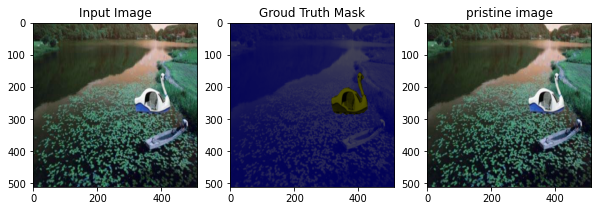

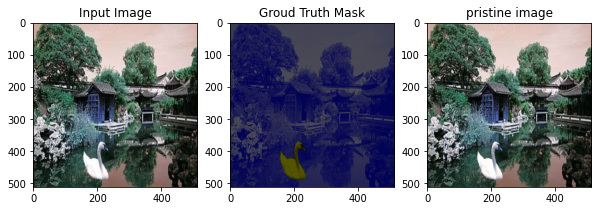

In [ ]:
print_results(model_path='/content/drive/MyDrive/LUAN-VAN/IFSM/Model/model_resnet50_classification',
              split_data_df =test_data[test_data['y']!='/content/drive/MyDrive/LUAN-VAN/IFSM/default.mask.png'],show_images=340)

#3. mUNet + backbone ResNet50

In [ ]:
def Conv_Block(inputs, num_filters):
  x = Conv2D(num_filters, 3, padding='same')(inputs)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)

  x = Conv2D(num_filters, 3, padding='same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)

  return x

In [ ]:
def Decoder_Block(inputs, skip_features, num_filters):
  x = Conv2D(num_filters/2, 1, padding='same')(inputs)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)

  x = Conv2DTranspose(num_filters/2, (4, 4), strides=2, padding='same')(x)

  x = Conv2D(num_filters, 1, padding='same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)

  x = Concatenate()([x, skip_features])
  x = Conv_Block(x, num_filters)
  return x

In [ ]:
resnet50 = ResNet50(include_top=False, weights='imagenet', input_shape=(512, 512, 3))
resnet50.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 518, 518, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 256, 256, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 256, 256, 64) 256         conv1_conv[0][0]                 
__________________________

In [ ]:
def Build_ResNet50_UNet():
  """ Input """
  inputs = Input(shape=(512,512,3))

  """ Pretrained ResNet50 Model """
  resnet50 = ResNet50(include_top=False, weights='imagenet', input_tensor=inputs)

  """ Encoder """
  s1 = resnet50.get_layer('conv1_relu').output        #256x256x64
  s2 = resnet50.get_layer('conv2_block3_out').output  #128x128x256
  s3 = resnet50.get_layer('conv3_block4_out').output  #64x64x512
  s4 = resnet50.get_layer('conv4_block6_out').output  #32x32x1024

  """ Brigde """
  b1 = resnet50.get_layer('conv5_block3_out').output  #16x16x2048

  """ Decoder """
  d1 = Decoder_Block(b1, s4, 1024)                    #32x32x1024
  d2 = Decoder_Block(d1, s3, 512)                     #64x64x512
  d3 = Decoder_Block(d2, s2, 256)                     #128x128x256
  d4 = Decoder_Block(d3, s1, 64)                      #256x256x64

  """ Upsampling """
  u = UpSampling2D((2, 2))(d4)                        #512x512x64

  """ Output """
  o = Conv2D(2, (1,1), padding='same', activation='softmax')(u)  #512x512x2

  model = Model(inputs, o)
  for layer in model.layers[0:171]:
    layer.trainable=False

  return model

In [ ]:
if __name__ == '__main__':
  mUNet = Build_ResNet50_UNet()
  mUNet.load_weights('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/Weights/mUNet/mUNet_weights_1.h5')
  mUNet.summary()

94773248/94765736 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 518, 518, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 256, 256, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 256, 256, 64) 256         conv1_conv[0][0]                 
_____________________________

In [ ]:
LR = 0.0001
input_shape=(512,512,3)
n_class = 2

In [ ]:
def weighted_categorical_crossentropy(y_true, y_pred):    
    #weights = K.variable([0.5,2.0,0.0])
    weights = [10,1.0]
        
    # scale predictions so that the class probas of each sample sum to 1
    y_pred /= tf.reduce_sum(y_pred, axis=-1, keepdims=True)
    # clip to prevent NaN's and Inf's
    y_pred = tf.clip_by_value(y_pred, 10e-8, 1 - 10e-8)
    # calc
    loss = y_true * tf.math.log(y_pred) * weights
    loss = -tf.reduce_sum(loss, -1)
    
    
    return loss

In [ ]:
def mIoU(y_true, y_pred):
    y_pred = K.round(K.cast(y_pred, tf.float32))
    pred0 = Lambda(lambda x : x[:,:,:,0])(y_pred)
    pred1 = Lambda(lambda x : x[:,:,:,1])(y_pred)
    true0 = Lambda(lambda x : x[:,:,:,0])(y_true)
    true1 = Lambda(lambda x : x[:,:,:,1])(y_true) # channel last?
    
    y_pred_0 = K.flatten(pred0)
    y_true_0 = K.flatten(true0)
    
    y_pred_1 = K.flatten(pred1)
    y_true_1 = K.flatten(true1)
    
    intersection0 = K.sum(y_true_0 * y_pred_0)
    intersection1 = K.sum(y_true_1 * y_pred_1)

    union0 = (K.sum(y_pred_0)+K.sum(y_true_0))
    union1 = (K.sum(y_pred_1)+K.sum(y_true_1))
    
    
    mIoU0 = (intersection0+K.epsilon())/(union0-intersection0+K.epsilon())
    mIoU1 = (intersection1+K.epsilon())/(union1-intersection1+K.epsilon())
    
    return ((mIoU0+mIoU1)/2.0)

In [ ]:
def fbeta(y_true, y_pred):
    y_pred = K.round(K.cast(y_pred, tf.float32))
    pred0 = Lambda(lambda x : x[:,:,:,0])(y_pred)
    pred1 = Lambda(lambda x : x[:,:,:,1])(y_pred)
    true0 = Lambda(lambda x : x[:,:,:,0])(y_true)
    true1 = Lambda(lambda x : x[:,:,:,1])(y_true) # channel last?
    
    y_pred_0 = K.flatten(pred0)
    y_true_0 = K.flatten(true0)
    
    y_pred_1 = K.flatten(pred1)
    y_true_1 = K.flatten(true1)
    
    intersection0 = K.sum(y_true_0 * y_pred_0)
    intersection1 = K.sum(y_true_1 * y_pred_1)

    precision0 = intersection0/(K.sum(y_pred_0)+K.epsilon())
    recall0 = intersection0/(K.sum(y_true_0)+K.epsilon())
    
    #precision1 = intersection1/(K.sum(y_pred_1)+K.epsilon())
    #recall1 = intersection1/(K.sum(y_true_1)+K.epsilon())
    
    fbeta0 = 2*(precision0*recall0)/(precision0+recall0+K.epsilon())
    #fbeta1 = 2*(precision1*recall1)/(precision1+recall1+K.epsilon())
    
    return fbeta0

In [ ]:
optim = keras.optimizers.Adam(LR)
metric = [tfa.metrics.F1Score(num_classes=2,average="micro",threshold=0.5)]
mUNet.compile(optimizer= optim, loss = weighted_categorical_crossentropy, metrics=['categorical_accuracy', fbeta, mIoU])

In [ ]:
def count_255_0():
    data = train_data
    data_reduced = data[data['y']!='/content/drive/MyDrive/LUAN-VAN/IFSM/default.mask.png']
    pixel_255=0
    for index,row in data_reduced.iterrows():
        mask = imread(row['y'])

        mask = mask.astype(np.int32)
        pixel_255 =  pixel_255 + count_255(mask)
    
    pixel_0= len(data_reduced)*len(data_reduced)-pixel_255

    return pixel_255, pixel_0

def count_255(mask):
    i=0
    for row in range(mask.shape[0]):
        for col in range(mask.shape[1]):
            if mask[row,col]==255:
                i+=1
    return i

In [ ]:
data = train_data
data_reduced = data[data['y']!='/content/drive/MyDrive/LUAN-VAN/IFSM/default.mask.png']
print(len(data_reduced))

27274


In [ ]:
pixel_255, pixel_0 = count_255_0()

In [ ]:
print(pixel_255)

6522143799


In [ ]:
print(pixel_0)

-5778272723


In [ ]:
data = [[[0, 1], [2, 3]], [[4, 5], [6, 7]], [[8, 9], [10, 11]]]
x =[]
for i in data:
  z=[]
  z.append(i)
  z.append(i)
  x.append(z)
x = np.array(x).reshape(-1, 2, 2)
print(x)

In [ ]:
for index,row in train_data.iloc[20:21].iterrows():
  image = imread(row['X'])
  image = cv2.resize(image, (16,16))
  image = image/255
  image = image.astype(np.float32)
  #mask= img_to_array(mask,dtype=np.uint8)
  print(image)

In [ ]:
for index,row in train_data.iloc[20:21].iterrows():
  mask = imread(row['y'])
  mask = cv2.resize(mask, (16,16))
  mask = mask/255
  mask = mask.astype(np.int32)
  mask = tf.one_hot(mask, 2, dtype=tf.int32)
  mask /= tf.reduce_sum(mask, axis=-1, keepdims=True)

  weights = [1.0,10.0]
  mask = tf.clip_by_value(mask, 10e-6, 1 - 10e-6)
  loss = tf.math.log(mask) * weights
  loss = -tf.reduce_sum(loss, -1)
  #mask = tf.clip_by_value(mask, 10e-6, 1 - 10e-6)
  #mask.set_shape([16, 16, 2])
  #mask= img_to_array(mask,dtype=np.uint8)
  print(loss)

In [ ]:
data = train_data
data_reduced = data[data['y']!='/content/drive/MyDrive/LUAN-VAN/IFSM/default.mask.png']
len(data_reduced)

14177

In [ ]:
len(train_data)

In [ ]:
batch_size = 16
def train_gen_fk():
    data = train_data
    data_reduced = data[data['y']!='/content/drive/MyDrive/LUAN-VAN/IFSM/default.mask.png']
    data_reduced=data_reduced.iloc[0:14176]
    while True:
        for start in range(0, 27264, batch_size):
            x_batch = []
            y_batch = []
            end = min(start + batch_size, data_reduced.shape[0])
            x_data_batch = data_reduced.iloc[start:end]
            
            for index,row in x_data_batch.iterrows():
                image = load_img(row['X'])
                image = img_to_array(image)
                mask = imread(row['y'])
                mask = mask/255
                mask = mask.astype(np.int32)
                mask = tf.one_hot(mask, 2, dtype=tf.int32)
                mask.set_shape([512, 512, 2])
                x_batch.append(image)
                y_batch.append(mask)
            
            x_batch = np.array(x_batch).reshape(-1, 512, 512, 3)/255
            y_batch = np.array(y_batch).reshape(-1, 512, 512, 2)

            yield x_batch, y_batch

def val_gen_fk():
    data = val_data
    data_reduced = data[data['y']!='/content/drive/MyDrive/LUAN-VAN/IFSM/default.mask.png']
    data_reduced= data_reduced.iloc[0:8224]
    while True:
        for start in range(0, 11280, batch_size):
            x_batch = []
            y_batch = []
            end = min(start + batch_size, data_reduced.shape[0])
            x_data_batch = data_reduced.iloc[start:end]
            
            for index,row in x_data_batch.iterrows():
                mask1 = []
                image = load_img(row['X'])
                image = img_to_array(image)
                mask = imread(row['y'])
                mask = mask/255
                mask = mask.astype(np.int32)
                mask = tf.one_hot(mask, 2, dtype=tf.int32)
                mask.set_shape([512, 512, 2])
                x_batch.append(image)
                y_batch.append(mask)
            
            x_batch = np.array(x_batch).reshape(-1, 512, 512, 3)/255
            y_batch = np.array(y_batch).reshape(-1, 512, 512, 2)

            yield x_batch, y_batch

def test_gen_fk():
    data = test_data
    #data_reduced = data[data['y']!='/content/drive/MyDrive/LUAN-VAN/IFSM/default.mask.png']
    while True:
        for start in range(0, data.shape[0], batch_size):
            x_batch = []
            y_batch = []
            end = min(start + batch_size, data.shape[0])
            x_data_batch = data.iloc[start:end]
            
            for index,row in x_data_batch.iterrows():
                image = load_img(row['X'])
                image = img_to_array(image)
                mask = imread(row['y'])
                mask = mask/255
                mask = mask.astype(np.int32)
                mask = tf.one_hot(mask, 2, dtype=tf.int32)
                mask.set_shape([512, 512, 2])
                x_batch.append(image)
                y_batch.append(mask)
            
            x_batch = np.array(x_batch).reshape(-1, 512, 512, 3)/255
            y_batch = np.array(y_batch).reshape(-1, 512, 512, 2)

            yield x_batch, y_batch

In [ ]:
train_data_gen = tf.data.Dataset.from_generator(train_gen_fk, output_types=(tf.float32, tf.float32),output_shapes=((batch_size,512,512,3), (batch_size,512,512,2)))
val_data_gen = tf.data.Dataset.from_generator(val_gen_fk, output_types=(tf.float32, tf.float32),output_shapes=((batch_size,512,512,3), (batch_size,512,512,2)))
test_data_gen = tf.data.Dataset.from_generator(test_gen_fk, output_types=(tf.float32, tf.float32),output_shapes=((batch_size,512,512,3), (batch_size,512,512,2)))

In [ ]:
print(f"Batch size and shape of input generator {list(train_data_gen.take(4).as_numpy_iterator())[0][0].shape}")
print(f"Batch size and shape of output generator {list(train_data_gen.take(4).as_numpy_iterator())[0][1].shape}")

Batch size and shape of input generator (8, 512, 512, 3)
Batch size and shape of output generator (8, 512, 512, 2)


In [ ]:
checkPoint_path = "/content/drive/MyDrive/LUAN-VAN/IFSM/model_checkpoints/mUNet/"

filepath= checkPoint_path+"weights-improvement-{epoch:02d}-{val_categorical_accuracy:.2f}.ckpt"

checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_categorical_accuracy', verbose=1,save_best_only=True,save_weights_only=True, mode='max')

tensorboard_log_dir = "/content/drive/MyDrive/LUAN-VAN/IFSM/logs/mUNet" 
tensorboard_path = os.path.join("logs",tensorboard_log_dir)

tensorboard_callback = TensorBoard(log_dir=tensorboard_path, histogram_freq=3)

callbacks_list = [
    checkpoint,
    tensorboard_callback]

In [ ]:
mUNet= load_model('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/mUNet',compile= False)

In [ ]:
mUNet.save_weights('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/Weights/mUNet/mUNet_weights.h5')

In [ ]:
train_fk= train_data[train_data['y']!='/content/drive/MyDrive/LUAN-VAN/IFSM/default.mask.png']
val_fk= val_data[val_data['y']!='/content/drive/MyDrive/LUAN-VAN/IFSM/default.mask.png']

In [ ]:
len(train_fk)

27274

In [ ]:
#16
batch_size = 16
max_epochs = 1

history = mUNet.fit(train_data_gen,
                    steps_per_epoch=886,
                    epochs=max_epochs,
                    validation_data=val_data_gen,
                    validation_steps=514,
                    callbacks=callbacks_list
                             )
mUNet.save_weights('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/Weights/mUNet/mUNet_weights_1.h5')


In [ ]:
mUNet.save_weights('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/Weights/mUNet/mUNet_weights_1.h5')

In [ ]:
#18
batch_size = 8
max_epochs = 2

history = mUNet.fit(train_data_gen,
                    steps_per_epoch=1704,
                    epochs=max_epochs,
                    validation_data=val_data_gen,
                    validation_steps=705,
                    callbacks=callbacks_list
                             )


Epoch 1/2
1704/1704 [==============================] - 1636s 960ms/step - loss: 0.2442 - categorical_accuracy: 0.9493 - val_loss: 1.5909 - val_categorical_accuracy: 0.9220

Epoch 00001: val_categorical_accuracy improved from 0.90568 to 0.92202, saving model to /content/drive/MyDrive/LUAN-VAN/IFSM/model_checkpoints/mUNet/weights-improvement-01-0.92.ckpt
Epoch 2/2
1704/1704 [==============================] - 1654s 970ms/step - loss: 0.2484 - categorical_accuracy: 0.9486 - val_loss: 1.1860 - val_categorical_accuracy: 0.8667

Epoch 00002: val_categorical_accuracy did not improve from 0.92202


In [ ]:
mUNet.save('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/mUNet1')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /content/drive/MyDrive/LUAN-VAN/IFSM/Model/mUNet1/assets


In [ ]:
#20
batch_size = 8
max_epochs = 2

history = mUNet.fit(train_data_gen,
                    steps_per_epoch=1704,
                    epochs=max_epochs,
                    validation_data=val_data_gen,
                    validation_steps=705,
                    callbacks=callbacks_list
                             )


Epoch 1/2
1704/1704 [==============================] - 1600s 939ms/step - loss: 0.1517 - categorical_accuracy: 0.9666 - val_loss: 1.7916 - val_categorical_accuracy: 0.9349

Epoch 00001: val_categorical_accuracy improved from 0.93174 to 0.93492, saving model to /content/drive/MyDrive/LUAN-VAN/IFSM/model_checkpoints/mUNet/weights-improvement-01-0.93.ckpt
Epoch 2/2
1704/1704 [==============================] - 1601s 940ms/step - loss: 0.1202 - categorical_accuracy: 0.9737 - val_loss: 1.6806 - val_categorical_accuracy: 0.9269

Epoch 00002: val_categorical_accuracy did not improve from 0.93492


In [ ]:
#22
batch_size = 8
max_epochs = 6

history = mUNet.fit(train_data_gen,
                    steps_per_epoch=1704,
                    epochs=max_epochs,
                    validation_data=val_data_gen,
                    validation_steps=705,
                    callbacks=callbacks_list
                             )

Epoch 1/6
1704/1704 [==============================] - 1590s 928ms/step - loss: 0.1546 - categorical_accuracy: 0.9639 - val_loss: 2.2087 - val_categorical_accuracy: 0.9395

Epoch 00001: val_categorical_accuracy improved from 0.93492 to 0.93951, saving model to /content/drive/MyDrive/LUAN-VAN/IFSM/model_checkpoints/mUNet/weights-improvement-01-0.94.ckpt
Epoch 2/6
1704/1704 [==============================] - 1589s 932ms/step - loss: 0.1230 - categorical_accuracy: 0.9726 - val_loss: 2.2336 - val_categorical_accuracy: 0.9252

Epoch 00002: val_categorical_accuracy did not improve from 0.93951
Epoch 3/6
1704/1704 [==============================] - 1568s 921ms/step - loss: 0.1599 - categorical_accuracy: 0.9629 - val_loss: 2.7709 - val_categorical_accuracy: 0.9322

Epoch 00003: val_categorical_accuracy did not improve from 0.93951
Epoch 4/6
1704/1704 [==============================] - 1570s 922ms/step - loss: 0.1175 - categorical_accuracy: 0.9741 - val_loss: 2.2137 - val_categorical_accuracy: 

In [ ]:
mUNet.save('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/mUNet1')

In [ ]:
mUNet.save('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/mUNet')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/LUAN-VAN/IFSM/Model/mUNet/assets


In [ ]:
model_vgg16_unet.load('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/model_vgg16_unet_tf_version2')

In [ ]:
test_fk= test_data[test_data['y']!='/content/drive/MyDrive/LUAN-VAN/IFSM/default.mask.png']

In [ ]:
#IEEE
test_data=pd.read_csv('/content/drive/MyDrive/LUAN-VAN/IFSM/Testing_Data/IEEE/data_agumented/test_data.csv')

In [ ]:
#CASIA1
test_data=pd.read_csv('/content/drive/MyDrive/LUAN-VAN/IFSM/Testing_Data/CASIA1/data_agumented/test_data.csv')

In [ ]:
#COLUMBIA
test_data=pd.read_csv('/content/drive/MyDrive/LUAN-VAN/IFSM/Testing_Data/COLUMBIA/data_agumented/test_data.csv')

In [ ]:
#COVERAGE
test_data=pd.read_csv('/content/drive/MyDrive/LUAN-VAN/IFSM/Testing_Data/COVERAGE/data_agumented/test_data.csv')

In [ ]:
batch_size=16
def test_gen_fk():
    data = test_data
    data_reduced = data[data['y']!='/content/drive/MyDrive/LUAN-VAN/IFSM/default.mask.png']
    while True:
        for start in range(0, data_reduced.shape[0], batch_size):
            x_batch = []
            y_batch = []
            end = min(start + batch_size, data_reduced.shape[0])
            x_data_batch = data_reduced.iloc[start:end]
            
            for index,row in x_data_batch.iterrows():
                image = load_img(row['X'])
                image = img_to_array(image)
                mask = imread(row['y'])
                mask = mask/255
                mask = mask.astype(np.int32)
                mask = tf.one_hot(mask, 2, dtype=tf.float32)
                mask.set_shape([512, 512, 2])
                x_batch.append(image)
                y_batch.append(mask)
            
            x_batch = np.array(x_batch).reshape(-1, 512, 512, 3)/255
            y_batch = np.array(y_batch).reshape(-1, 512, 512, 2)

            yield x_batch, y_batch

In [ ]:
batch_size=16
def test_gen():
    data = test_data
    #data_reduced = data[data['y']!='/content/drive/MyDrive/LUAN-VAN/IFSM/default.mask.png']
    while True:
        for start in range(0, data.shape[0], batch_size):
            x_batch = []
            y_batch = []
            end = min(start + batch_size, data.shape[0])
            x_data_batch = data.iloc[start:end]
            
            for index,row in x_data_batch.iterrows():
                image = load_img(row['X'])
                image = img_to_array(image)
                mask = imread(row['y'])
                mask = mask/255
                mask = mask.astype(np.int32)
                mask = tf.one_hot(mask, 2, dtype=tf.float32)
                mask.set_shape([512, 512, 2])
                x_batch.append(image)
                y_batch.append(mask)
            
            x_batch = np.array(x_batch).reshape(-1, 512, 512, 3)/255
            y_batch = np.array(y_batch).reshape(-1, 512, 512, 2)

            yield x_batch, y_batch

In [ ]:
test_data_gen = tf.data.Dataset.from_generator(test_gen, output_types=(tf.float32, tf.float32),output_shapes=((batch_size,512,512,3), (batch_size,512,512,2)))

In [ ]:
data = test_data
data_reduced = data[data['y']!='/content/drive/MyDrive/LUAN-VAN/IFSM/default.mask.png']
len(data_reduced)/16

11.25

In [ ]:
len(test_data)/16

22.6875

##IEEE

In [ ]:
#IEEE
test_data=pd.read_csv('/content/drive/MyDrive/LUAN-VAN/IFSM/Testing_Data/IEEE/data_agumented/test_data.csv')

In [ ]:
#Ảnh giả
logloss_on_testdata, acc,f1_score_on_testdata, mIoU = mUNet.evaluate_generator(test_gen_fk(),steps=44,verbose=1)
print(f'Logloss on TEST data {logloss_on_testdata}')
print(f'Logloss on TEST data {acc}')
print(f'F1_Score on TEST data {f1_score_on_testdata}')
print(f'F1_Score on TEST data {mIoU}')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


44/44 [==============================] - 26s 607ms/step - loss: 2.2644 - categorical_accuracy: 0.8423 - fbeta: 0.1593 - mIoU: 0.4639
Logloss on TEST data 2.2644126415252686
Logloss on TEST data 0.8422629833221436
F1_Score on TEST data 0.15925854444503784
F1_Score on TEST data 0.46393632888793945


In [ ]:
#Cả Ảnh giả và Ảnh thật
logloss_on_testdata, acc,f1_score_on_testdata, mIoU = mUNet.evaluate_generator(test_gen(),steps=83,verbose=1)
print(f'Logloss on TEST data {logloss_on_testdata}')
print(f'Logloss on TEST data {acc}')
print(f'F1_Score on TEST data {f1_score_on_testdata}')
print(f'F1_Score on TEST data {mIoU}')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


83/83 [==============================] - 716s 9s/step - loss: 1.3474 - categorical_accuracy: 0.8477 - fbeta: 0.0940 - mIoU: 0.4485
Logloss on TEST data 1.347376823425293
Logloss on TEST data 0.8477492928504944
F1_Score on TEST data 0.09400064498186111
F1_Score on TEST data 0.4485391676425934


##CASIA1

In [ ]:
#CASIA1
test_data=pd.read_csv('/content/drive/MyDrive/LUAN-VAN/IFSM/Testing_Data/CASIA1/data_agumented/test_data.csv')

In [ ]:
#Ảnh giả
logloss_on_testdata, acc,f1_score_on_testdata, mIoU = mUNet.evaluate_generator(test_gen_fk(),steps=57,verbose=1)
print(f'Logloss on TEST data {logloss_on_testdata}')
print(f'Logloss on TEST data {acc}')
print(f'F1_Score on TEST data {f1_score_on_testdata}')
print(f'F1_Score on TEST data {mIoU}')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


57/57 [==============================] - 1776s 32s/step - loss: 0.6784 - categorical_accuracy: 0.9026 - fbeta: 0.5651 - mIoU: 0.6483
Logloss on TEST data 0.6784104704856873
Logloss on TEST data 0.9026057124137878
F1_Score on TEST data 0.5650618672370911
F1_Score on TEST data 0.6482642292976379


In [ ]:
#Cả Ảnh giả và Ảnh thật
logloss_on_testdata, acc,f1_score_on_testdata, mIoU = mUNet.evaluate_generator(test_gen(),steps=107,verbose=1)
print(f'Logloss on TEST data {logloss_on_testdata}')
print(f'Logloss on TEST data {acc}')
print(f'F1_Score on TEST data {f1_score_on_testdata}')
print(f'F1_Score on TEST data {mIoU}')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


107/107 [==============================] - 936s 9s/step - loss: 0.4012 - categorical_accuracy: 0.9346 - fbeta: 0.5013 - mIoU: 0.6393
Logloss on TEST data 0.40122082829475403
Logloss on TEST data 0.9346007704734802
F1_Score on TEST data 0.5012558698654175
F1_Score on TEST data 0.6392883658409119


##COVERAGE

In [ ]:
#COVERAGE
test_data=pd.read_csv('/content/drive/MyDrive/LUAN-VAN/IFSM/Testing_Data/COVERAGE/data_agumented/test_data.csv')

In [ ]:
#Ảnh giả
logloss_on_testdata, acc,f1_score_on_testdata, mIoU = mUNet.evaluate_generator(test_gen_fk(),steps=6,verbose=1)
print(f'Logloss on TEST data {logloss_on_testdata}')
print(f'Logloss on TEST data {acc}')
print(f'F1_Score on TEST data {f1_score_on_testdata}')
print(f'F1_Score on TEST data {mIoU}')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


6/6 [==============================] - 144s 29s/step - loss: 1.0573 - categorical_accuracy: 0.7661 - fbeta: 0.4228 - mIoU: 0.5067
Logloss on TEST data 1.0573201179504395
Logloss on TEST data 0.7661252021789551
F1_Score on TEST data 0.42278429865837097
F1_Score on TEST data 0.5066630840301514


In [ ]:
#Cả Ảnh giả và Ảnh thật
logloss_on_testdata, acc,f1_score_on_testdata, mIoU = mUNet.evaluate_generator(test_gen(),steps=12,verbose=1)
print(f'Logloss on TEST data {logloss_on_testdata}')
print(f'Logloss on TEST data {acc}')
print(f'F1_Score on TEST data {f1_score_on_testdata}')
print(f'F1_Score on TEST data {mIoU}')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


12/12 [==============================] - 98s 9s/step - loss: 0.8156 - categorical_accuracy: 0.7524 - fbeta: 0.2540 - mIoU: 0.4440
Logloss on TEST data 0.8156407475471497
Logloss on TEST data 0.7523600459098816
F1_Score on TEST data 0.25403085350990295
F1_Score on TEST data 0.4439999759197235


##COLUMBIA

In [ ]:
#COLUMBIA
test_data=pd.read_csv('/content/drive/MyDrive/LUAN-VAN/IFSM/Testing_Data/COLUMBIA/data_agumented/test_data.csv')

In [ ]:
#Ảnh giả
logloss_on_testdata, acc,f1_score_on_testdata, mIoU = mUNet.evaluate_generator(test_gen_fk(),steps=11,verbose=1)
print(f'Logloss on TEST data {logloss_on_testdata}')
print(f'Logloss on TEST data {acc}')
print(f'F1_Score on TEST data {f1_score_on_testdata}')
print(f'F1_Score on TEST data {mIoU}')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


11/11 [==============================] - 290s 29s/step - loss: 1.0155 - categorical_accuracy: 0.8490 - fbeta: 0.7613 - mIoU: 0.7091
Logloss on TEST data 1.0155131816864014
Logloss on TEST data 0.8489580154418945
F1_Score on TEST data 0.7612628936767578
F1_Score on TEST data 0.7091142535209656


In [ ]:
#Cả Ảnh giả và Ảnh thật
logloss_on_testdata, acc,f1_score_on_testdata, mIoU = mUNet.evaluate_generator(test_gen(),steps=22,verbose=1)
print(f'Logloss on TEST data {logloss_on_testdata}')
print(f'Logloss on TEST data {acc}')
print(f'F1_Score on TEST data {f1_score_on_testdata}')
print(f'F1_Score on TEST data {mIoU}')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


22/22 [==============================] - 180s 9s/step - loss: 0.8305 - categorical_accuracy: 0.7776 - fbeta: 0.5088 - mIoU: 0.5475
Logloss on TEST data 0.8304502367973328
Logloss on TEST data 0.7775993943214417
F1_Score on TEST data 0.5088286995887756
F1_Score on TEST data 0.5475184917449951


##Result

In [ ]:
def print_results(model_path,split_data_df,show_images=10):
    """This function prints the input image,its ground truth mask along with predicted mask
        model_path : Takes the path of trianed model
        split_data_df : Takes the pd.DataFrame object that should contain image path and mask path in X and Y named columns
        show_images : number of random images that should sampled from "split_data_df"
    """
    samples = split_data_df.sample(n=show_images)
    model = tf.keras.models.load_model(model_path, compile=False)
    input_img = []
    input_img_array = []
    mask_array = []
    GT_mask = []
    Predicted_mask = []
    for index,row in samples.iterrows():
        img = load_img(row['X'])
        image = load_img(row['X'])

        #tf_image = tf.data.Dataset.from_tensor_slices(image_arr)

        mask = imread(row['y'])
        mask = np.expand_dims(mask, axis =-1)
        mask = mask/3
        mask1 = mask.astype(np.int32)
        mask = np.concatenate([mask1, mask1, mask1], axis =2)

        #image = cv2.resize(image, (512, 512))
        #image_arr=image/255

        #image_arr = image_arr.astype(np.float32)
        image_arr = img_to_array(image)
        image_arr=np.array(image_arr).reshape(-1, 512, 512, 3)/255.0

        #output = model.predict(np.expand_dims(image_arr, axis=0))[0]
        output = model.predict(image_arr).reshape(512,512,2)
        output = np.argmax(output, axis=-1)
        output = np.expand_dims(output, axis=-1)
        output = output*(255/3)
        output1 = output.astype(np.int32)
        output = np.concatenate([output1, output1, output1], axis =2)

        #image = image*255
        #image = image.astype(np.int32)

        #h, w, _ = image.shape
        #line = np.ones((h, 10, 3))*255
        image1 = cv2.imread(row['X'], cv2.IMREAD_GRAYSCALE)
        image1 = np.expand_dims(image1, axis =-1)
        image1 = image1/3
        image1 = image1.astype(np.int32)
        #final_image = np.concatenate([image, line, mask, line, output], axis=-1)
        fig, ax = plt.subplots(1,3,figsize=(10, 10))   
        ax[0].imshow(img)
        ax[0].set_title("Input Image")
        ax[1].imshow(np.concatenate([mask1,image1,  image1], axis=2))
        ax[1].set_title("Predicted Mask")
        ax[2].imshow(np.concatenate([image1, image1, output1], axis=2))
        ax[2].set_title("Groud Truth Mask")

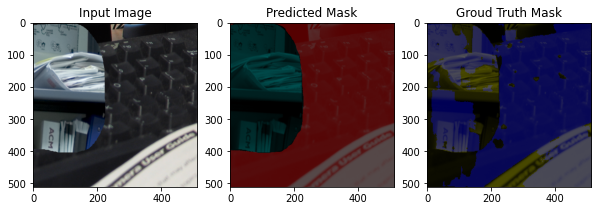

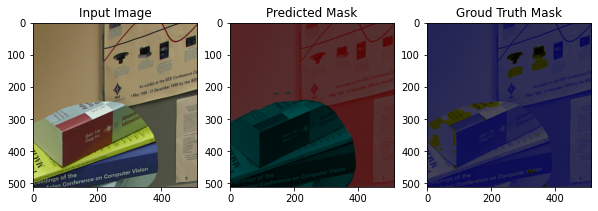

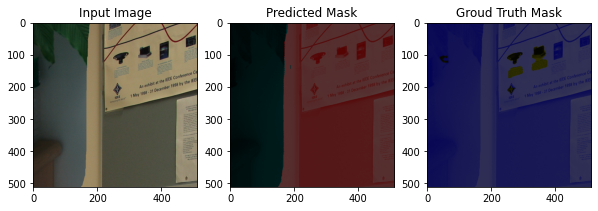

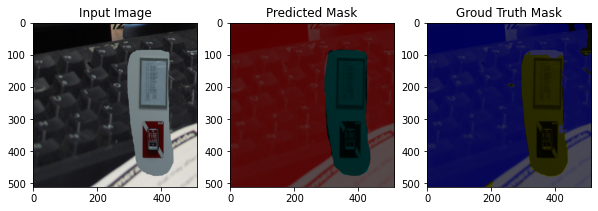

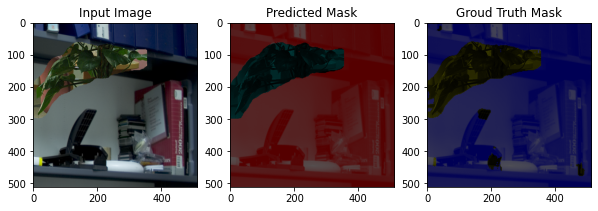

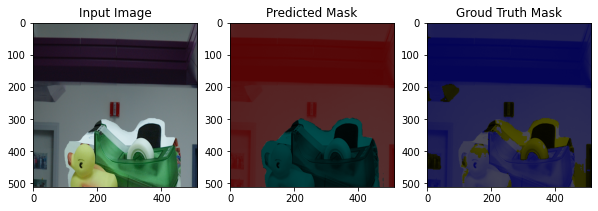

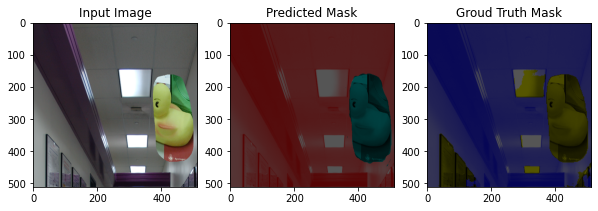

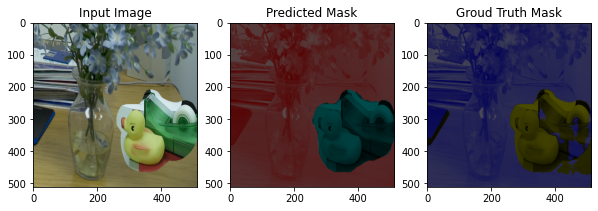

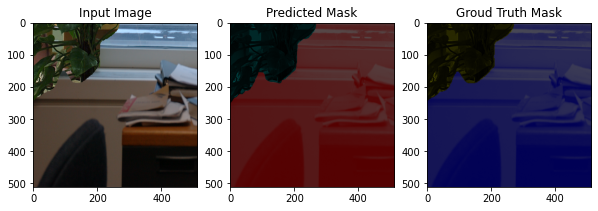

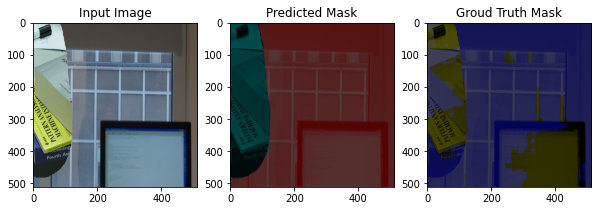

In [ ]:
print_results(model_path='/content/drive/MyDrive/LUAN-VAN/IFSM/Model/mUNet',
              split_data_df =test_data[test_data['y']!='/content/drive/MyDrive/LUAN-VAN/IFSM/default.mask.png'],show_images=10)

In [ ]:
#print pris image
def print_results(model_path,split_data_df,show_images):
    """This function prints the input image,its ground truth mask along with predicted mask
        model_path : Takes the path of trianed model
        split_data_df : Takes the pd.DataFrame object that should contain image path and mask path in X and Y named columns
        show_images : number of random images that should sampled from "split_data_df"
    """
    samples = split_data_df.iloc[show_images:show_images+50]
    model = tf.keras.models.load_model(model_path, compile=False)
    input_img = []
    input_img_array = []
    mask_array = []
    GT_mask = []
    Predicted_mask = []
    for index,row in samples.iterrows():
        img = load_img(row['X'])
        image = load_img(row['X'])

        #tf_image = tf.data.Dataset.from_tensor_slices(image_arr)

        mask = imread(row['y'])
        mask = np.expand_dims(mask, axis =-1)
        mask = mask/3
        mask1 = mask.astype(np.int32)
        mask = np.concatenate([mask1, mask1, mask1], axis =2)

        #image = cv2.resize(image, (512, 512))
        #image_arr=image/255

        #image_arr = image_arr.astype(np.float32)
        image_arr = img_to_array(image)
        image_arr=np.array(image_arr).reshape(-1, 512, 512, 3)/255.0

        #output = model.predict(np.expand_dims(image_arr, axis=0))[0]
        output = model.predict(image_arr).reshape(512,512,2)
        output = np.argmax(output, axis=-1)
        output = np.expand_dims(output, axis=-1)
        output = output*(255/3)
        output1 = output.astype(np.int32)
        output = np.concatenate([output1, output1, output1], axis =2)

        #image = image*255
        #image = image.astype(np.int32)

        image1 = cv2.imread(row['X'], cv2.IMREAD_GRAYSCALE)
        h, w = image1.shape
        line = np.ones((30, w, 3))*255
        image1 = np.expand_dims(image1, axis =-1)
        image1 = image1/3
        image1 = image1.astype(np.int32)

        gt = np.concatenate([image1, image1, mask1], axis=2)
        pred = np.concatenate([ image1, image1, output1], axis=2)

        final_image = np.concatenate([image, line, pred], axis=-3)
        input_img.append(image)
        GT_mask.append(gt)
        Predicted_mask.append(pred)
        #cv2.imwrite(row['X'].split('/')[-1], final_image)
    for i in range(50):
        fig, ax = plt.subplots(1,3,figsize=(10, 10))   
        ax[0].imshow(input_img[i])
        ax[0].set_title("Input Image"+str(show_images+i))
        ax[1].imshow(Predicted_mask[i])
        ax[1].set_title("Predicted Mask")
        ax[2].imshow(GT_mask[i])
        ax[2].set_title("Groud Truth Mask")


In [ ]:
print_results(model_path='/content/drive/MyDrive/LUAN-VAN/IFSM/Model/mUNet1',
              split_data_df =test_data,show_images=500)

# 4. ResNet50 + mUNet

In [6]:
def Conv_Block(inputs, num_filters):
  x = Conv2D(num_filters, 3, padding='same')(inputs)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)

  x = Conv2D(num_filters, 3, padding='same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)

  return x

In [7]:
def Decoder_Block(inputs, skip_features, num_filters):
  x = Conv2D(num_filters/2, 1, padding='same')(inputs)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)

  x = Conv2DTranspose(num_filters/2, (4, 4), strides=2, padding='same')(x)

  x = Conv2D(num_filters, 1, padding='same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)

  x = Concatenate()([x, skip_features])
  x = Conv_Block(x, num_filters)
  return x

In [8]:
def Build_ResNet50_and_mUNet():
  """ Input """
  inputs = Input(shape=(512,512,3))

  """ Pretrained ResNet50 Model """
  resnet50 = ResNet50(include_top=False, weights='imagenet', input_tensor=inputs)

  b1 = resnet50.get_layer('conv5_block3_out').output  #16x16x2048

  c1 = AveragePooling2D(pool_size=(16, 16), input_shape=(16,16,2048))(b1)
  c2 = Flatten(input_shape=(1, 1, 2048))(c1)
  output1 = Dense(2, activation='softmax', name="output1")(c2)
  ResNet50_model=Model(inputs, output1)
  ResNet50_model.load_weights('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/Weights/ressnet50_model_adam_weights_33.h5')
  output1 = ResNet50_model.output

  """ Encoder """
  s1 = ResNet50_model.get_layer('conv1_relu').output        #256x256x64
  s2 = ResNet50_model.get_layer('conv2_block3_out').output  #128x128x256
  s3 = ResNet50_model.get_layer('conv3_block4_out').output  #64x64x512
  s4 = ResNet50_model.get_layer('conv4_block6_out').output  #32x32x1024

  """ Brigde """
  b1 = ResNet50_model.get_layer('conv5_block3_out').output  #16x16x2048
	


  """ Decoder """
  d1 = Decoder_Block(b1, s4, 1024)                    #32x32x1024
  d2 = Decoder_Block(d1, s3, 512)                     #64x64x512
  d3 = Decoder_Block(d2, s2, 256)                     #128x128x256
  d4 = Decoder_Block(d3, s1, 64)                      #256x256x64

  """ Upsampling """
  u = UpSampling2D((2, 2))(d4)                        #512x512x64

  """ Output """
  output2 = Conv2D(2, (1,1), padding='same', activation='softmax', name="output2")(u)  #512x512x2

  mUNet = Model(ResNet50_model.input, output2)
  mUNet.load_weights('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/Weights/mUNet/mUNet_weights.h5')
  output2 = mUNet.output

  model_1 = Model(inputs= mUNet.input,outputs= [output1, output2])
  model_1.load_weights('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/Weights/umUNet_fix_1/umUNet_weights_7.h5')
  
  x = tf.round(model_1.output[0])
  x = tf.expand_dims(x, axis=1)
  y = tf.expand_dims(x, axis=1)
  z = tf.tile(y, multiples=[1, 512, 512, 1])
  output = tf.add_n([tf.math.multiply(z,model_1.output[1]*[1, -1]), model_1.output[1]*[0, 1], z*[0, 1]], name='output')

  model = Model(inputs= model_1.input,outputs= output)  
  return model

In [ ]:
def Build_ResNet50_and_mUNet():
  """ Input """
  inputs = Input(shape=(512,512,3))

  """ Pretrained ResNet50 Model """
  resnet50 = ResNet50(include_top=False, weights='imagenet', input_tensor=inputs)

  b1 = resnet50.get_layer('conv5_block3_out').output  #16x16x2048

  c1 = AveragePooling2D(pool_size=(16, 16), input_shape=(16,16,2048))(b1)
  c2 = Flatten(input_shape=(1, 1, 2048))(c1)
  output1 = Dense(2, activation='softmax', name="output1")(c2)
  ResNet50_model=Model(inputs, output1)
  ResNet50_model.load_weights('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/Weights/ressnet50_model_adam_weights_33.h5')
  output1 = ResNet50_model.output

  """ Encoder """
  s1 = ResNet50_model.get_layer('conv1_relu').output        #256x256x64
  s2 = ResNet50_model.get_layer('conv2_block3_out').output  #128x128x256
  s3 = ResNet50_model.get_layer('conv3_block4_out').output  #64x64x512
  s4 = ResNet50_model.get_layer('conv4_block6_out').output  #32x32x1024

  """ Brigde """
  b1 = ResNet50_model.get_layer('conv5_block3_out').output  #16x16x2048
	


  """ Decoder """
  d1 = Decoder_Block(b1, s4, 1024)                    #32x32x1024
  d2 = Decoder_Block(d1, s3, 512)                     #64x64x512
  d3 = Decoder_Block(d2, s2, 256)                     #128x128x256
  d4 = Decoder_Block(d3, s1, 64)                      #256x256x64

  """ Upsampling """
  u = UpSampling2D((2, 2))(d4)                        #512x512x64

  """ Output """
  output2 = Conv2D(2, (1,1), padding='same', activation='softmax', name="output2")(u)  #512x512x2

  mUNet = Model(ResNet50_model.input, output2)
  mUNet.load_weights('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/Weights/mUNet/mUNet_weights_1.h5')
  output2 = mUNet.output
  x = tf.round(output1)
  x = tf.expand_dims(x, axis=1)
  y = tf.expand_dims(x, axis=1)
  z = tf.tile(y, multiples=[1, 512, 512, 1])
  output = tf.add_n([tf.math.multiply(z,output2*[1, -1]), output2*[0, 1], z*[0, 1]], name='output')

  model = Model(inputs= mUNet.input,outputs= output)
  return model

In [9]:
if __name__ == '__main__':
  with tf.device('/device:GPU:0'):
    ResNet50_and_mUNet = Build_ResNet50_and_mUNet()
    for layer in ResNet50_and_mUNet.layers[0:171]:
      layer.trainable=False
    ResNet50_and_mUNet.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 518, 518, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 256, 256, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                           

In [10]:
ResNet50_and_mUNet.save_weights('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/Weights/ResNet50_mUNet/ResNet50_mUNet_weights.h5')

In [ ]:
ResNet50_and_mUNet.save('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/ResNet50_and_mUNet_test')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/LUAN-VAN/IFSM/Model/ResNet50_and_mUNet_test/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
LR = 0.005
input_shape=(512,512,3)
n_class = 2

In [ ]:
def weighted_categorical_crossentropy1(y_true, y_pred):    
    #weights = K.variable([0.5,2.0,0.0])
    weights = [10,1]
 
    y_pred /= tf.reduce_sum(y_pred, axis=-1, keepdims=True)
    # clip to prevent NaN's and Inf's
    #one= tf.ones([512, 512, 2], tf.float32)
    
    y_pred = tf.clip_by_value(y_pred, 10e-8, 1 - 10e-8)
    loss2= y_true * tf.math.log(y_pred)*weights
    loss2 = -tf.reduce_sum(loss2, -1)
    
    return loss2

In [ ]:
def custom_acc(y_true, y_pred):
    y_pred = K.round(K.cast(y_pred, tf.float32))
    pred0 = Lambda(lambda x : x[:,:,:,0])(y_pred)
    pred1 = Lambda(lambda x : x[:,:,:,1])(y_pred)
    true0 = Lambda(lambda x : x[:,:,:,0])(y_true)
    true1 = Lambda(lambda x : x[:,:,:,1])(y_true) # channel last?
    
    y_pred_0 = K.flatten(pred0)
    y_true_0 = K.flatten(true0)
    
    y_pred_1 = K.flatten(pred1)
    y_true_1 = K.flatten(true1)
    
    intersection0 = K.sum(y_true_0 * y_pred_0)
    intersection1 = K.sum(y_true_1 * y_pred_1)

    acc = (intersection0+intersection1+K.epsilon())/(K.sum(y_true_0)+K.sum(y_true_1)+K.epsilon())
    
    return acc

In [ ]:
def fbeta(y_true, y_pred):
    y_pred = K.round(y_pred)
    #y_true = K.round(K.cast(y_true, tf.float32))
    pred0 = Lambda(lambda x : x[:,:,:,0])(y_pred)
    pred1 = Lambda(lambda x : x[:,:,:,1])(y_pred)
    true0 = Lambda(lambda x : x[:,:,:,0])(y_true)
    true1 = Lambda(lambda x : x[:,:,:,1])(y_true) # channel last?
    
    y_pred_0 = K.flatten(pred0)
    y_true_0 = K.flatten(true0)
    
    #y_pred_1 = K.flatten(pred1)
    #y_true_1 = K.flatten(true1)
    
    intersection0 = K.sum(y_true_0 * y_pred_0)
    #intersection1 = K.sum(y_true_1 * y_pred_1)

    precision0 = intersection0/(K.sum(y_pred_0)+K.epsilon())
    recall0 = intersection0/(K.sum(y_true_0)+K.epsilon())
    
    #precision1 = intersection1/(K.sum(y_pred_1)+K.epsilon())
    #recall1 = intersection1/(K.sum(y_true_1)+K.epsilon())
    
    fbeta0 = 2*(precision0*recall0)/(precision0+recall0+K.epsilon())
    #fbeta1 = 2*(precision1*recall1)/(precision1+recall1+K.epsilon())
    
    return fbeta0

In [ ]:
def mIoU(y_true, y_pred):
    y_pred = K.round(K.cast(y_pred, tf.float32))
    #y_true = K.round(K.cast(y_true, tf.float32))
    pred0 = Lambda(lambda x : x[:,:,:,0])(y_pred)
    pred1 = Lambda(lambda x : x[:,:,:,1])(y_pred)
    true0 = Lambda(lambda x : x[:,:,:,0])(y_true)
    true1 = Lambda(lambda x : x[:,:,:,1])(y_true) # channel last?
    
    y_pred_0 = K.flatten(pred0)
    y_true_0 = K.flatten(true0)
    
    y_pred_1 = K.flatten(pred1)
    y_true_1 = K.flatten(true1)
    
    intersection0 = K.sum(y_true_0 * y_pred_0)
    intersection1 = K.sum(y_true_1 * y_pred_1)

    union0 = (K.sum(y_pred_0)+K.sum(y_true_0))
    union1 = (K.sum(y_pred_1)+K.sum(y_true_1))
    
    
    mIoU0 = (intersection0+K.epsilon())/(union0-intersection0+K.epsilon())
    mIoU1 = (intersection1+K.epsilon())/(union1-intersection1+K.epsilon())
    
    return (mIoU0+mIoU1)/2.0

In [ ]:
optim = keras.optimizers.Adam(LR)
ResNet50_and_mUNet.compile(optimizer= optim, loss = weighted_categorical_crossentropy1, metrics=['categorical_accuracy', fbeta, mIoU])

In [ ]:
def test_gen():
    data = test_data
    #data_reduced = data[data['y']!='/content/drive/MyDrive/LUAN-VAN/IFSM/default.mask.png']
    while True:
        for start in range(0, data.shape[0], batch_size):
            x_batch = []
            y_batch = []
            end = min(start + batch_size, data.shape[0])
            x_data_batch = data.iloc[start:end]
            
            for index,row in x_data_batch.iterrows():
                image = load_img(row['X'])
                image = img_to_array(image)
                mask = imread(row['y'])
                mask = mask/255
                mask = mask.astype(np.int32)
                mask = tf.one_hot(mask, 2, dtype=tf.float32)
                mask.set_shape([512, 512, 2])
                x_batch.append(image)
                y_batch.append(mask)
            
            x_batch = np.array(x_batch).reshape(-1, 512, 512, 3)/255
            y_batch = np.array(y_batch).reshape(-1, 512, 512, 2)

            yield x_batch, y_batch

In [ ]:
#IEEE
test_data=pd.read_csv('/content/drive/MyDrive/LUAN-VAN/IFSM/Testing_Data/IEEE/data_agumented/test_data.csv')

In [ ]:
#CASIA1
test_data=pd.read_csv('/content/drive/MyDrive/LUAN-VAN/IFSM/Testing_Data/CASIA1/data_agumented/test_data.csv')

In [ ]:
#COLUMBIA
test_data=pd.read_csv('/content/drive/MyDrive/LUAN-VAN/IFSM/Testing_Data/COLUMBIA/data_agumented/test_data.csv')

In [ ]:
len(test_data)//8

214

In [ ]:
batch_size = 8
logloss_on_testdata, acc, f1_score, iou = ResNet50_and_mUNet.evaluate_generator(test_gen(),steps=214,verbose=1)
print(f'F1_Score on TEST data {acc}')
print(f'F1_Score on TEST data {f1_score}')
print(f'F1_Score on TEST data {iou}')

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


115/214 [===============>..............] - ETA: 4:24 - loss: 1.8236 - categorical_accuracy: 0.9693 - fbeta: 0.5470 - mIoU: 0.6923

In [ ]:
def print_results(model_mUNet, model_ResNet50_mUNet,split_data_df,show_images):
    """This function prints the input image,its ground truth mask along with predicted mask
        model_path : Takes the path of trianed model
        split_data_df : Takes the pd.DataFrame object that should contain image path and mask path in X and Y named columns
        show_images : number of random images that should sampled from "split_data_df"
    """
    samples = split_data_df.iloc[show_images:show_images+1]
    model_mUNet = tf.keras.models.load_model(model_mUNet, compile=False)
    model_ResNet50_mUNet = tf.keras.models.load_model(model_ResNet50_mUNet, compile=False)    
    input_img = []
    input_img_array = []
    mask_array = []
    GT_mask = []
    Predicted_mUNet = []
    Predicted_ResNet50_mUNet = []
    for index,row in samples.iterrows():
        img = load_img(row['X'])
        image = load_img(row['X'])

        #tf_image = tf.data.Dataset.from_tensor_slices(image_arr)

        mask = imread(row['y'])
        mask = np.expand_dims(mask, axis =-1)
        mask = mask/3
        mask1 = mask.astype(np.int32)

        #image = cv2.resize(image, (512, 512))
        #image_arr=image/255

        #image_arr = image_arr.astype(np.float32)
        image_arr = img_to_array(image)
        image_arr=np.array(image_arr).reshape(-1, 512, 512, 3)/255.0

        #output = model.predict(np.expand_dims(image_arr, axis=0))[0]
        output_mUNet = model_mUNet.predict(image_arr).reshape(512,512,2)
        output_mUNet = np.argmax(output_mUNet, axis=-1)
        output_mUNet = np.expand_dims(output_mUNet, axis=-1)
        output_mUNet = output_mUNet*(255/3)
        output_mUNet = output_mUNet.astype(np.int32)

        output_ResNet50_mUNet = model_ResNet50_mUNet.predict(image_arr)
        output_ResNet50_mUNet = output_ResNet50_mUNet.reshape(512,512,2)
        output_ResNet50_mUNet = np.argmax(output_ResNet50_mUNet, axis=-1)
        output_ResNet50_mUNet = np.expand_dims(output_ResNet50_mUNet, axis=-1)
        output_ResNet50_mUNet = output_ResNet50_mUNet*(255/3)
        output_ResNet50_mUNet = output_ResNet50_mUNet.astype(np.int32)
        #image = image*255
        #image = image.astype(np.int32)

        image1 = cv2.imread(row['X'], cv2.IMREAD_GRAYSCALE)
        h, w = image1.shape
        line = np.ones((30, w, 3))*255
        image1 = np.expand_dims(image1, axis =-1)
        image1 = image1/3
        image1 = image1.astype(np.int32)

        gt = np.concatenate([mask1, image1, image1], axis=2)
        pred_mUNet = np.concatenate([output_mUNet, image1, image1 ], axis=2)
        pred_ResNet50_mUNet = np.concatenate([output_ResNet50_mUNet, image1, image1 ], axis=2)

        final_image = np.concatenate([image, line, gt, line, pred_mUNet, line, pred_ResNet50_mUNet], axis=-3)
        cv2.imwrite(row['X'].split('/')[-1], final_image)

In [ ]:
print_results(model_mUNet='/content/drive/MyDrive/LUAN-VAN/IFSM/Model/mUNet',model_ResNet50_mUNet='/content/drive/MyDrive/LUAN-VAN/IFSM/Model/ResNet50_and_mUNet_test',
              split_data_df =test_data[test_data['y']!='/content/drive/MyDrive/LUAN-VAN/IFSM/default.mask.png'],show_images=334)

#5. umUNet: Phân loại + Phân đoạn

In [ ]:
def Conv_Block(inputs, num_filters):
  x = Conv2D(num_filters, 3, padding='same')(inputs)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)

  x = Conv2D(num_filters, 3, padding='same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)

  return x

In [ ]:
def Decoder_Block(inputs, skip_features, num_filters):
  x = Conv2D(num_filters/2, 1, padding='same')(inputs)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)

  x = Conv2DTranspose(num_filters/2, (4, 4), strides=2, padding='same')(x)

  x = Conv2D(num_filters, 1, padding='same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)

  x = Concatenate()([x, skip_features])
  x = Conv_Block(x, num_filters)
  return x

In [ ]:
def Build_ResNet50_umUNet_fix_1():
  """ Input """
  inputs = Input(shape=(512,512,3))

  """ Pretrained ResNet50 Model """
  resnet50 = ResNet50(include_top=False, weights='imagenet', input_tensor=inputs)

  b1 = resnet50.get_layer('conv5_block3_out').output  #16x16x2048

  c1 = AveragePooling2D(pool_size=(16, 16), input_shape=(16,16,2048))(b1)
  c2 = Flatten(input_shape=(1, 1, 2048))(c1)
  output1 = Dense(2, activation='softmax', name="output1")(c2)
  ResNet50_model=Model(inputs, output1)
  ResNet50_model.load_weights('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/Weights/ressnet50_model_adam_weights_33.h5')
  output1 = ResNet50_model.output

  """ Encoder """
  s1 = ResNet50_model.get_layer('conv1_relu').output        #256x256x64
  s2 = ResNet50_model.get_layer('conv2_block3_out').output  #128x128x256
  s3 = ResNet50_model.get_layer('conv3_block4_out').output  #64x64x512
  s4 = ResNet50_model.get_layer('conv4_block6_out').output  #32x32x1024

  """ Brigde """
  b1 = ResNet50_model.get_layer('conv5_block3_out').output  #16x16x2048
	


  """ Decoder """
  d1 = Decoder_Block(b1, s4, 1024)                    #32x32x1024
  d2 = Decoder_Block(d1, s3, 512)                     #64x64x512
  d3 = Decoder_Block(d2, s2, 256)                     #128x128x256
  d4 = Decoder_Block(d3, s1, 64)                      #256x256x64

  """ Upsampling """
  u = UpSampling2D((2, 2))(d4)                        #512x512x64

  """ Output """
  output2 = Conv2D(2, (1,1), padding='same', activation='softmax', name="output2")(u)  #512x512x2

  mUNet = Model(ResNet50_model.input, output2)
  mUNet.load_weights('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/Weights/mUNet/mUNet_weights.h5')
  output2 = mUNet.output

  model = Model(inputs= mUNet.input,outputs= [output1, output2])
  return model

In [ ]:
if __name__ == '__main__':
  with tf.device('/device:GPU:0'):
    umUNet_fix_1 = Build_ResNet50_umUNet_fix_1()
    for layer in umUNet_fix_1.layers[0:171]:
      layer.trainable=False
    umUNet_fix_1.load_weights('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/Weights/umUNet_fix_1/umUNet_weights_8.h5')
    umUNet_fix_1.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 518, 518, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 256, 256, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 256, 256, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
umUNet_fix_1= umUNet_fix_1.save('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/umUNet_test')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /content/drive/MyDrive/LUAN-VAN/IFSM/Model/umUNet_test/assets


In [ ]:
umUNet_fix_1= load_model('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/umUNet_test',compile= False)

In [ ]:
LR = 0.005
input_shape=(512,512,3)
n_class = 2

In [ ]:
def weighted_categorical_crossentropy(noise):    
    #weights = K.variable([0.5,2.0,0.0])
    def loss(y_true, y_pred):


        weights = [10,1] 
        y_pred /= tf.reduce_sum(y_pred, axis=-1, keepdims=True)
        # clip to prevent NaN's and Inf's
        one= tf.ones(y_pred.shape, tf.float32)
        new_pred = y_pred*noise*[1, -1] + y_pred*[0, 1] + one*noise*[0, 1]
    
        new_pred = tf.clip_by_value(new_pred, 10e-8, 1 - 10e-8)
        loss2= y_true * tf.math.log(new_pred)*weights
        
        loss2 = -tf.reduce_sum(loss2, -1)
    
        return loss2
    return loss

** Kết hợp

In [ ]:
def weighted_categorical_crossentropy(y_true, y_pred):    
    #weights = K.variable([0.5,2.0,0.0])
    weights = [20,1]
 
    y_pred /= tf.reduce_sum(y_pred, axis=-1, keepdims=True)
    # clip to prevent NaN's and Inf's
    #one= tf.ones([512, 512, 2], tf.float32)
    
    y_pred = tf.clip_by_value(y_pred, 10e-8, 1 - 10e-8)
    loss2= y_true * tf.math.log(y_pred)*weights
    loss2 = -tf.reduce_sum(loss2, -1)
    
    return loss2

In [ ]:
def weighted_categorical_crossentropy1(y_true, y_pred):    
    #weights = K.variable([0.5,2.0,0.0])
    weights = [10,1]
 
    y_pred /= tf.reduce_sum(y_pred, axis=-1, keepdims=True)
    # clip to prevent NaN's and Inf's
    #one= tf.ones([512, 512, 2], tf.float32)
    
    y_pred = tf.clip_by_value(y_pred, 10e-8, 1 - 10e-8)
    loss2= y_true * tf.math.log(y_pred)*weights
    loss2 = -tf.reduce_sum(loss2, -1)
    
    return loss2

In [ ]:
def custom_acc(y_true, y_pred):
    y_pred = K.round(K.cast(y_pred, tf.float32))
    pred0 = Lambda(lambda x : x[:,:,:,0])(y_pred)
    pred1 = Lambda(lambda x : x[:,:,:,1])(y_pred)
    true0 = Lambda(lambda x : x[:,:,:,0])(y_true)
    true1 = Lambda(lambda x : x[:,:,:,1])(y_true) # channel last?
    
    y_pred_0 = K.flatten(pred0)
    y_true_0 = K.flatten(true0)
    
    y_pred_1 = K.flatten(pred1)
    y_true_1 = K.flatten(true1)
    
    intersection0 = K.sum(y_true_0 * y_pred_0)
    intersection1 = K.sum(y_true_1 * y_pred_1)

    acc = (intersection0+intersection1+K.epsilon())/(K.sum(y_true_0)+K.sum(y_true_1)+K.epsilon())
    
    return acc

In [ ]:
def fbeta(y_true, y_pred):
    y_pred = K.round(y_pred)
    #y_true = K.round(K.cast(y_true, tf.float32))
    pred0 = Lambda(lambda x : x[:,:,:,0])(y_pred)
    pred1 = Lambda(lambda x : x[:,:,:,1])(y_pred)
    true0 = Lambda(lambda x : x[:,:,:,0])(y_true)
    true1 = Lambda(lambda x : x[:,:,:,1])(y_true) # channel last?
    
    y_pred_0 = K.flatten(pred0)
    y_true_0 = K.flatten(true0)
    
    y_pred_1 = K.flatten(pred1)
    y_true_1 = K.flatten(true1)
    
    intersection0 = K.sum(y_true_0 * y_pred_0)
    intersection1 = K.sum(y_true_1 * y_pred_1)

    precision0 = intersection0/(K.sum(y_pred_0)+K.epsilon())
    recall0 = intersection0/(K.sum(y_true_0)+K.epsilon())
    
    precision1 = intersection1/(K.sum(y_pred_1)+K.epsilon())
    recall1 = intersection1/(K.sum(y_true_1)+K.epsilon())
    
    fbeta0 = 2*(precision0*recall0)/(precision0+recall0+K.epsilon())
    fbeta1 = 2*(precision1*recall1)/(precision1+recall1+K.epsilon())
    
    return (fbeta0+fbeta1)/2.0

In [ ]:
def mIoU(y_true, y_pred):
    y_pred = K.round(K.cast(y_pred, tf.float32))
    #y_true = K.round(K.cast(y_true, tf.float32))
    pred0 = Lambda(lambda x : x[:,:,:,0])(y_pred)
    pred1 = Lambda(lambda x : x[:,:,:,1])(y_pred)
    true0 = Lambda(lambda x : x[:,:,:,0])(y_true)
    true1 = Lambda(lambda x : x[:,:,:,1])(y_true) # channel last?
    
    y_pred_0 = K.flatten(pred0)
    y_true_0 = K.flatten(true0)
    
    y_pred_1 = K.flatten(pred1)
    y_true_1 = K.flatten(true1)
    
    intersection0 = K.sum(y_true_0 * y_pred_0)
    intersection1 = K.sum(y_true_1 * y_pred_1)

    union0 = (K.sum(y_pred_0)+K.sum(y_true_0))
    union1 = (K.sum(y_pred_1)+K.sum(y_true_1))
    
    
    mIoU0 = (intersection0+K.epsilon())/(union0-intersection0+K.epsilon())
    mIoU1 = (intersection1+K.epsilon())/(union1-intersection1+K.epsilon())
    
    return (mIoU0+mIoU1)/2.0

In [ ]:
def fbeta(y_true, y_pred):
    y_pred = K.round(y_pred)
    #y_true = K.round(K.cast(y_true, tf.float32))
    pred0 = Lambda(lambda x : x[:,:,:,0])(y_pred)
    pred1 = Lambda(lambda x : x[:,:,:,1])(y_pred)
    true0 = Lambda(lambda x : x[:,:,:,0])(y_true)
    true1 = Lambda(lambda x : x[:,:,:,1])(y_true) # channel last?
    
    y_pred_0 = K.flatten(pred0)
    y_true_0 = K.flatten(true0)
    
    #y_pred_1 = K.flatten(pred1)
    #y_true_1 = K.flatten(true1)
    
    intersection0 = K.sum(y_true_0 * y_pred_0)
    #intersection1 = K.sum(y_true_1 * y_pred_1)

    precision0 = intersection0/(K.sum(y_pred_0)+K.epsilon())
    recall0 = intersection0/(K.sum(y_true_0)+K.epsilon())
    
    #precision1 = intersection1/(K.sum(y_pred_1)+K.epsilon())
    #recall1 = intersection1/(K.sum(y_true_1)+K.epsilon())
    
    fbeta0 = 2*(precision0*recall0)/(precision0+recall0+K.epsilon())
    #fbeta1 = 2*(precision1*recall1)/(precision1+recall1+K.epsilon())
    
    return fbeta0

In [ ]:
losses1 = {
    'output1': 'categorical_crossentropy',
    'output2' :weighted_categorical_crossentropy1
}
lossWeights = {"output1": 2.0, "output2": 1.0}

In [ ]:
losses = {
    'output1': 'categorical_crossentropy',
    'output2' :weighted_categorical_crossentropy,
    'tf.__operators__.add_3': weighted_categorical_crossentropy3
}
lossWeights = {"output1": 2.0, "output2": 1.0}

In [ ]:
with tf.device('/device:GPU:0'):
  optim = keras.optimizers.Adam(LR)
  #metric = [tfa.metrics.F1Score(num_classes=2,average="micro",threshold=0.5)]
  umUNet_fix_1.compile(optimizer= optim, loss = losses1, loss_weights= [0, 1], metrics= {'output1': 'categorical_accuracy', 'output2': [custom_acc, fbeta, mIoU]})

In [ ]:
with tf.device('/device:GPU:0'):
  optim = keras.optimizers.Adam(LR)
  #metric = [tfa.metrics.F1Score(num_classes=2,average="micro",threshold=0.5)]
  umUNet_fix_3.compile(optimizer= optim, loss = losses, loss_weights= [1, 0.0000001, 1], metrics= {'output1': 'categorical_accuracy', 'output2': [custom_acc, fbeta], 'tf.__operators__.add_3': [custom_acc, fbeta, mIoU]})

In [ ]:
batch_size = 8
def train_gen():
    data = train_data.iloc[0:27744]
    #data_reduced = data[data['y']!='/content/drive/MyDrive/LUAN-VAN/IFSM/default.mask.png']
    while True:
        for start in range(0, data.shape[0], batch_size):
            x_batch = []
            y1_batch = []
            y2_batch = []
            end = min(start + batch_size, data.shape[0])
            x_data_batch = data.iloc[start:end]
            
            for index,row in x_data_batch.iterrows():
                image = load_img(row['X'])
                image = img_to_array(image)
                mask = imread(row['y'])
                mask = mask/255
                mask = mask.astype(np.int32)
                mask = tf.one_hot(mask, 2, dtype=tf.float32)
                mask.set_shape([512, 512, 2])
                if row['y'] !='/content/drive/MyDrive/LUAN-VAN/IFSM/default.mask.png':
                    label=[1.0, 0.0]
                else:
                    label=[0.0, 1.0]                                  

                x_batch.append(image)
                y1_batch.append(label)
                y2_batch.append(mask)
            
            x_batch = np.array(x_batch).reshape(-1, 512, 512, 3)/255

            x = tf.expand_dims(y1_batch, axis=1)
            y = tf.expand_dims(x, axis=1)
            z = tf.tile(y, multiples=[1, 512, 512, 1])
                
            y2_batch = tf.concat([z, y2_batch], axis=-1)
            y2_batch = np.array(y2_batch).reshape(-1, 512, 512, 4)
            y1_batch = np.array(y1_batch).reshape(-1, 2)
            yield x_batch, [y1_batch, y2_batch]

def val_gen():
    data = val_data[0:11488]
    #data_reduced = data[data['y']!='/content/drive/MyDrive/LUAN-VAN/IFSM/default.mask.png']
    while True:
        for start in range(0, data.shape[0], batch_size):
            x_batch = []
            y1_batch = []
            y2_batch = []
            end = min(start + batch_size, data.shape[0])
            x_data_batch = data.iloc[start:end]
            
            for index,row in x_data_batch.iterrows():
                mask1 = []
                image = load_img(row['X'])
                image = img_to_array(image)
                mask = imread(row['y'])
                mask = mask/255
                mask = mask.astype(np.int32)
                mask = tf.one_hot(mask, 2, dtype=tf.float32)
                mask.set_shape([512, 512, 2])
                if row['y'] !='/content/drive/MyDrive/LUAN-VAN/IFSM/default.mask.png':
                    label=[1.0, 0.0]
                else:
                    label=[0.0, 1.0]                                  
                x_batch.append(image)
                y1_batch.append(label)
                y2_batch.append(mask)
            
            x_batch = np.array(x_batch).reshape(-1, 512, 512, 3)/255

            x = tf.expand_dims(y1_batch, axis=1)
            y = tf.expand_dims(x, axis=1)
            z = tf.tile(y, multiples=[1, 512, 512, 1])
                
            y2_batch = tf.concat([z, y2_batch], axis=-1)
            y2_batch = np.array(y2_batch).reshape(-1, 512, 512, 4)
            y1_batch = np.array(y1_batch).reshape(-1, 2)
            yield x_batch, [y1_batch, y2_batch]

def test_gen():
    data = test_data
    #data_reduced = data[data['y']!='/content/drive/MyDrive/LUAN-VAN/IFSM/default.mask.png']
    while True:
        for start in range(0, data.shape[0], batch_size):
            x_batch = []
            y1_batch = []
            y2_batch = []
            end = min(start + batch_size, data.shape[0])
            x_data_batch = data.iloc[start:end]
            
            for index,row in x_data_batch.iterrows():
                image = load_img(row['X'])
                image = img_to_array(image)
                mask = imread(row['y'])
                mask = mask/255
                mask = mask.astype(np.int32)
                mask = tf.one_hot(mask, 2, dtype=tf.float32)
                mask.set_shape([512, 512, 2])
                if row['y'] !='/content/drive/MyDrive/LUAN-VAN/IFSM/default.mask.png':
                    label=[1, 0]
                else:
                    label=[0, 1]                                  
                x_batch.append(image)
                y1_batch.append(label)
                y2_batch.append(mask)
            
            x_batch = np.array(x_batch).reshape(-1, 512, 512, 3)/255

            x = tf.expand_dims(y1_batch, axis=1)
            y = tf.expand_dims(x, axis=1)
            z = tf.tile(y, multiples=[1, 512, 512, 1])
                
            y2_batch = tf.concat([z, y2_batch], axis=-1)
            y2_batch = np.array(y2_batch).reshape(-1, 512, 512, 4)
            y1_batch = np.array(y1_batch).reshape(-1, 2)
            yield x_batch, [y1_batch, y2_batch]

In [ ]:
55488/2

27744.0

In [ ]:
len(train_data)

3624

In [ ]:
batch_size = 15
def train_gen():
    data = train_data.iloc[0:3615]
    #data_reduced = data[data['y']!='/content/drive/MyDrive/LUAN-VAN/IFSM/default.mask.png']
    while True:
        for start in range(0, data.shape[0], batch_size):
            x_batch = []
            y1_batch = []
            y2_batch = []
            end = min(start + batch_size, data.shape[0])
            x_data_batch = data.iloc[start:end]
            
            for index,row in x_data_batch.iterrows():
                image = load_img(row['X'])
                image = img_to_array(image)
                mask = imread(row['y'])
                mask = mask/255
                mask = mask.astype(np.int32)
                mask = tf.one_hot(mask, 2, dtype=tf.float32)
                mask.set_shape([512, 512, 2])
                if row['y'] !='/content/drive/MyDrive/LUAN-VAN/IFSM/default.mask.png':
                    label=[1.0, 0.0]
                else:
                    label=[0.0, 1.0]                                  
                x_batch.append(image)
                y1_batch.append(label)
                y2_batch.append(mask)
            #y_batch = tf.concat([y2_batch, y2_batch], axis=-1)            
            x_batch = np.array(x_batch).reshape(-1, 512, 512, 3)/255
            y1_batch = np.array(y1_batch)
            y2_batch = np.array(y2_batch).reshape(-1, 512, 512, 2)

            yield x_batch, [y1_batch, y2_batch, y2_batch]

def val_gen():
    data = val_data.iloc[0:15465]
    #data_reduced = data[data['y']!='/content/drive/MyDrive/LUAN-VAN/IFSM/default.mask.png']
    while True:
        for start in range(0, data.shape[0], batch_size):
            x_batch = []
            y1_batch = []
            y2_batch = []
            end = min(start + batch_size, data.shape[0])
            x_data_batch = data.iloc[start:end]
            
            for index,row in x_data_batch.iterrows():
                mask1 = []
                image = load_img(row['X'])
                image = img_to_array(image)
                mask = imread(row['y'])
                mask = mask/255
                mask = mask.astype(np.int32)
                mask = tf.one_hot(mask, 2, dtype=tf.float32)
                mask.set_shape([512, 512, 2])
                if row['y'] !='/content/drive/MyDrive/LUAN-VAN/IFSM/default.mask.png':
                    label=[1.0, 0.0]
                else:
                    label=[0.0, 1.0]                                  
                x_batch.append(image)
                y1_batch.append(label)
                y2_batch.append(mask)
            #y_batch = tf.concat([y2_batch, y2_batch], axis=-1)            
            x_batch = np.array(x_batch).reshape(-1, 512, 512, 3)/255
            y1_batch = np.array(y1_batch)
            y2_batch = np.array(y2_batch).reshape(-1, 512, 512, 2)

            yield x_batch, [y1_batch, y2_batch, y2_batch]

def test_gen():
    data = test_data
    #data_reduced = data[data['y']!='/content/drive/MyDrive/LUAN-VAN/IFSM/default.mask.png']
    while True:
        for start in range(0, data.shape[0], batch_size):
            x_batch = []
            y1_batch = []
            y2_batch = []
            end = min(start + batch_size, data.shape[0])
            x_data_batch = data.iloc[start:end]
            
            for index,row in x_data_batch.iterrows():
                image = load_img(row['X'])
                image = img_to_array(image)
                mask = imread(row['y'])
                mask = mask/255
                mask = mask.astype(np.int32)
                mask = tf.one_hot(mask, 2, dtype=tf.float32)
                mask.set_shape([512, 512, 2])
                if row['y'] !='/content/drive/MyDrive/LUAN-VAN/IFSM/default.mask.png':
                    label=[1, 0]
                else:
                    label=[0, 1]                                  
                x_batch.append(image)
                y1_batch.append(label)
                y2_batch.append(mask)
            #y_batch = tf.concat([y2_batch, y2_batch], axis=-1)            
            x_batch = np.array(x_batch).reshape(-1, 512, 512, 3)/255
            y1_batch = np.array(y1_batch)
            y2_batch = np.array(y2_batch).reshape(-1, 512, 512, 2)

            yield x_batch, [y1_batch, y2_batch]

In [ ]:
data = train_data
data_reduced = data[data['y']!='/content/drive/MyDrive/LUAN-VAN/IFSM/default.mask.png']
len(data_reduced)

12978

In [ ]:
#fix_1
batch_size = 8
def train_gen_fk():
    data = train_data
    data_reduced = data[data['y']!='/content/drive/MyDrive/LUAN-VAN/IFSM/default.mask.png']
    data_reduced = data_reduced.iloc[0:12976]
    while True:
        for start in range(0, data_reduced.shape[0], batch_size):
            x_batch = []
            y1_batch = []
            y2_batch = []
            end = min(start + batch_size, data_reduced.shape[0])
            x_data_batch = data_reduced.iloc[start:end]
            
            for index,row in x_data_batch.iterrows():
                image = load_img(row['X'])
                image = img_to_array(image)
                mask = imread(row['y'])
                mask = mask/255
                mask = mask.astype(np.int32)
                mask = tf.one_hot(mask, 2, dtype=tf.float32)
                mask.set_shape([512, 512, 2])
                if row['y'] !='/content/drive/MyDrive/LUAN-VAN/IFSM/default.mask.png':
                    label=[1.0, 0.0]
                else:
                    label=[0.0, 1.0]                                  
                x_batch.append(image)
                y1_batch.append(label)
                y2_batch.append(mask)
            #y_batch = tf.concat([y2_batch, y2_batch], axis=-1)            
            x_batch = np.array(x_batch).reshape(-1, 512, 512, 3)/255
            y1_batch = np.array(y1_batch)
            y2_batch = np.array(y2_batch).reshape(-1, 512, 512, 2)

            yield x_batch, [y1_batch, y2_batch]

def val_gen_fk():
    data = val_data
    data_reduced = data[data['y']!='/content/drive/MyDrive/LUAN-VAN/IFSM/default.mask.png']
    data_reduced = data_reduced.iloc[0:8224]
    while True:
        for start in range(0, data_reduced.shape[0], batch_size):
            x_batch = []
            y1_batch = []
            y2_batch = []
            end = min(start + batch_size, data_reduced.shape[0])
            x_data_batch = data_reduced.iloc[start:end]
            
            for index,row in x_data_batch.iterrows():
                mask1 = []
                image = load_img(row['X'])
                image = img_to_array(image)
                mask = imread(row['y'])
                mask = mask/255
                mask = mask.astype(np.int32)
                mask = tf.one_hot(mask, 2, dtype=tf.float32)
                mask.set_shape([512, 512, 2])
                if row['y'] !='/content/drive/MyDrive/LUAN-VAN/IFSM/default.mask.png':
                    label=[1.0, 0.0]
                else:
                    label=[0.0, 1.0]                                  
                x_batch.append(image)
                y1_batch.append(label)
                y2_batch.append(mask)
            #y_batch = tf.concat([y2_batch, y2_batch], axis=-1)            
            x_batch = np.array(x_batch).reshape(-1, 512, 512, 3)/255
            y1_batch = np.array(y1_batch)
            y2_batch = np.array(y2_batch).reshape(-1, 512, 512, 2)

            yield x_batch, [y1_batch, y2_batch]


In [ ]:
train_data_gen = tf.data.Dataset.from_generator(train_gen, output_types=(tf.float32, tf.float32, tf.float32),output_shapes=((batch_size,512,512,3), (batch_size,2), (batch_size,512,512,4)))
val_data_gen = tf.data.Dataset.from_generator(val_gen, output_types=(tf.float32, tf.float32, tf.float32),output_shapes=((batch_size,512,512,3), (batch_size,2), (batch_size,512,512,4)))
test_data_gen = tf.data.Dataset.from_generator(test_gen, output_types=(tf.float32, tf.float32, tf.float32),output_shapes=((batch_size,512,512,3), (batch_size,2), (batch_size,512,512,4)))

In [ ]:
#CASIA1
test_data=pd.read_csv('/content/drive/MyDrive/LUAN-VAN/IFSM/Testing_Data/CASIA1/data_agumented/test_data.csv')

In [ ]:
checkPoint_path = "/content/drive/MyDrive/LUAN-VAN/IFSM/model_checkpoints/umUNet_fix/"

filepath= checkPoint_path+"weights-improvement-{epoch:02d}-{val_tf.math.add_n_custom_acc:.2f}.ckpt"

checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_tf.math.add_n_custom_acc', verbose=1,save_best_only=True,save_weights_only=True, mode='max')

tensorboard_log_dir = "/content/drive/MyDrive/LUAN-VAN/IFSM/logs/umUNet_fix" 
tensorboard_path = os.path.join("logs",tensorboard_log_dir)

tensorboard_callback = TensorBoard(log_dir=tensorboard_path, histogram_freq=3)

callbacks_list = [
    checkpoint,
    tensorboard_callback]

In [ ]:
1734*2*8

27744

In [ ]:
719*2*8

11504

In [ ]:
train_data.shape[0]

55505

In [ ]:
batch_size = 8
max_epochs = 3
with tf.device('/device:GPU:0'):
  history = umUNet.fit(train_gen(),
                    steps_per_epoch=3185,
                    epochs=max_epochs,
                    validation_data=val_gen(),
                    validation_steps=1934
                             )
  

Epoch 1/3
3185/3185 [==============================] - 21255s 7s/step - loss: 2.0992 - output1_loss: 0.6490 - tf.math.add_n_2_loss: 0.8013 - output1_categorical_accuracy: 0.6237 - tf.math.add_n_2_custom_acc: 0.8957 - tf.math.add_n_2_fbeta: 0.5303 - val_loss: 2.2371 - val_output1_loss: 0.6664 - val_tf.math.add_n_2_loss: 0.9044 - val_output1_categorical_accuracy: 0.5917 - val_tf.math.add_n_2_custom_acc: 0.8526 - val_tf.math.add_n_2_fbeta: 0.5013
Epoch 2/3
3185/3185 [==============================] - 2617s 822ms/step - loss: 2.0616 - output1_loss: 0.6365 - tf.math.add_n_2_loss: 0.7886 - output1_categorical_accuracy: 0.6394 - tf.math.add_n_2_custom_acc: 0.9011 - tf.math.add_n_2_fbeta: 0.5374 - val_loss: 2.3042 - val_output1_loss: 0.6967 - val_tf.math.add_n_2_loss: 0.9108 - val_output1_categorical_accuracy: 0.5646 - val_tf.math.add_n_2_custom_acc: 0.8775 - val_tf.math.add_n_2_fbeta: 0.5008
Epoch 3/3
3185/3185 [==============================] - 2625s 824ms/step - loss: 2.0410 - output1_loss:

In [ ]:
batch_size = 8
max_epochs = 3
with tf.device('/device:GPU:0'):
  history = umUNet.fit(train_gen(),
                    steps_per_epoch=3185,
                    epochs=max_epochs,
                    validation_data=val_gen(),
                    validation_steps=1934
                             )
  umUNet.save('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/umUNet_fix_2')
  umUNet.save_weights('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/Weights/umUNet_fix_2/umUNet_weights_1.h5')

Epoch 1/3
3185/3185 [==============================] - 2678s 841ms/step - loss: 2.0242 - output1_loss: 0.6238 - tf.math.add_n_2_loss: 0.7766 - output1_categorical_accuracy: 0.6548 - tf.math.add_n_2_custom_acc: 0.8992 - tf.math.add_n_2_fbeta: 0.5428 - val_loss: 2.5178 - val_output1_loss: 0.7790 - val_tf.math.add_n_2_loss: 0.9598 - val_output1_categorical_accuracy: 0.5220 - val_tf.math.add_n_2_custom_acc: 0.9397 - val_tf.math.add_n_2_fbeta: 0.4953
Epoch 2/3
3185/3185 [==============================] - 2662s 836ms/step - loss: 2.0088 - output1_loss: 0.6185 - tf.math.add_n_2_loss: 0.7719 - output1_categorical_accuracy: 0.6606 - tf.math.add_n_2_custom_acc: 0.8982 - tf.math.add_n_2_fbeta: 0.5445 - val_loss: 2.5282 - val_output1_loss: 0.7793 - val_tf.math.add_n_2_loss: 0.9696 - val_output1_categorical_accuracy: 0.5277 - val_tf.math.add_n_2_custom_acc: 0.9416 - val_tf.math.add_n_2_fbeta: 0.4947
Epoch 3/3
3185/3185 [==============================] - 2648s 831ms/step - loss: 1.9951 - output1_los

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /content/drive/MyDrive/LUAN-VAN/IFSM/Model/umUNet_fix_2/assets


In [ ]:
print(2)
batch_size = 8
max_epochs = 3
with tf.device('/device:GPU:0'):
  history = umUNet.fit(train_gen(),
                    steps_per_epoch=3185,
                    epochs=max_epochs,
                    validation_data=val_gen(),
                    validation_steps=1934
                             )
  #umUNet.save('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/umUNet_fix_2')
  umUNet.save_weights('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/Weights/umUNet_fix_2/umUNet_weights_2.h5')

print(3)
batch_size = 8
max_epochs = 2
with tf.device('/device:GPU:0'):
  history = umUNet.fit(train_gen(),
                    steps_per_epoch=3185,
                    epochs=max_epochs,
                    validation_data=val_gen(),
                    validation_steps=1934
                             )
  #umUNet.save('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/umUNet_fix_2')
  umUNet.save_weights('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/Weights/umUNet_fix_2/umUNet_weights_3.h5')

print(4)
batch_size = 8
max_epochs = 1
with tf.device('/device:GPU:0'):
  history = umUNet.fit(train_gen(),
                    steps_per_epoch=3185,
                    epochs=max_epochs,
                    validation_data=val_gen(),
                    validation_steps=1934
                             )
  #umUNet.save('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/umUNet_fix_2')
  umUNet.save_weights('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/Weights/umUNet_fix_2/umUNet_weights_4.h5')

print(5)
batch_size = 8
max_epochs = 1
with tf.device('/device:GPU:0'):
  history = umUNet.fit(train_gen(),
                    steps_per_epoch=3185,
                    epochs=max_epochs,
                    validation_data=val_gen(),
                    validation_steps=1934
                             )
  umUNet.save('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/umUNet_fix_2')
  umUNet.save_weights('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/Weights/umUNet_fix_2/umUNet_weights_5.h5')

print(6)
batch_size = 8
max_epochs = 1
with tf.device('/device:GPU:0'):
  history = umUNet.fit(train_gen(),
                    steps_per_epoch=3185,
                    epochs=max_epochs,
                    validation_data=val_gen(),
                    validation_steps=1934
                             )
  umUNet.save('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/umUNet_fix_2')
  umUNet.save_weights('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/Weights/umUNet_fix_2/umUNet_weights_6.h5')

print(7)
batch_size = 8
max_epochs = 1
with tf.device('/device:GPU:0'):
  history = umUNet.fit(train_gen(),
                    steps_per_epoch=3185,
                    epochs=max_epochs,
                    validation_data=val_gen(),
                    validation_steps=1934
                             )
  umUNet.save('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/umUNet_fix_2')
  umUNet.save_weights('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/Weights/umUNet_fix_2/umUNet_weights_7.h5')

print(8)
batch_size = 8
max_epochs = 1
with tf.device('/device:GPU:0'):
  history = umUNet.fit(train_gen(),
                    steps_per_epoch=3185,
                    epochs=max_epochs,
                    validation_data=val_gen(),
                    validation_steps=1934
                             )
  umUNet.save('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/umUNet_fix_2')
  umUNet.save_weights('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/Weights/umUNet_fix_2/umUNet_weights_8.h5')

2
Epoch 1/3
3185/3185 [==============================] - 2673s 839ms/step - loss: 1.9824 - output1_loss: 0.6098 - tf.math.add_n_2_loss: 0.7629 - output1_categorical_accuracy: 0.6686 - tf.math.add_n_2_custom_acc: 0.8963 - tf.math.add_n_2_fbeta: 0.5477 - val_loss: 2.5000 - val_output1_loss: 0.7642 - val_tf.math.add_n_2_loss: 0.9715 - val_output1_categorical_accuracy: 0.5420 - val_tf.math.add_n_2_custom_acc: 0.9385 - val_tf.math.add_n_2_fbeta: 0.4959
Epoch 2/3
3185/3185 [==============================] - 2651s 832ms/step - loss: 1.9697 - output1_loss: 0.6057 - tf.math.add_n_2_loss: 0.7583 - output1_categorical_accuracy: 0.6727 - tf.math.add_n_2_custom_acc: 0.8955 - tf.math.add_n_2_fbeta: 0.5494 - val_loss: 2.4961 - val_output1_loss: 0.7469 - val_tf.math.add_n_2_loss: 1.0024 - val_output1_categorical_accuracy: 0.5541 - val_tf.math.add_n_2_custom_acc: 0.9455 - val_tf.math.add_n_2_fbeta: 0.4932
Epoch 3/3
3185/3185 [==============================] - 2630s 826ms/step - loss: 1.9577 - output1_l

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /content/drive/MyDrive/LUAN-VAN/IFSM/Model/umUNet_fix_2/assets
6
2320/3185 [====================>.........] - ETA: 8:58 - loss: 1.9054 - output1_loss: 0.5851 - tf.math.add_n_2_loss: 0.7353 - output1_categorical_accuracy: 0.6898 - tf.math.add_n_2_custom_acc: 0.8914 - tf.math.add_n_2_fbeta: 0.5588

In [ ]:
umUNet.save('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/umUNet_fix_2')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /content/drive/MyDrive/LUAN-VAN/IFSM/Model/umUNet_fix_2/assets


In [ ]:
umUNet.save_weights('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/Weights/umUNet_fix_2/umUNet_weights_0.h5')

In [ ]:
batch_size = 8
max_epochs = 1
with tf.device('/device:GPU:0'):
  history1 = umUNet_fix_1.fit(train_gen_fk(),
                    steps_per_epoch=811,
                    epochs=max_epochs,
                    validation_data=val_gen_fk(),
                    validation_steps=514
                             )
  #umUNet_fix_1.save('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/umUNet_fix_1')
  umUNet_fix_1.save_weights('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/Weights/umUNet_fix_1/umUNet_weights_9.h5')

In [ ]:
umUNet_fix_1.save_weights('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/Weights/umUNet_fix_1/umUNet_weights_4.h5')

In [ ]:

print(1)
batch_size = 16
max_epochs = 3
with tf.device('/device:GPU:0'):
  history1 = umUNet_fix_1.fit(train_gen_fk(),
                    steps_per_epoch=886,
                    epochs=max_epochs,
                    validation_data=val_gen_fk(),
                    validation_steps=514
                             )
  #umUNet_fix_1.save('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/umUNet_fix_1')
  umUNet_fix_1.save_weights('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/Weights/umUNet_fix_1/umUNet_weights_1.h5')


print(2)
batch_size = 16
max_epochs = 3
with tf.device('/device:GPU:0'):
  history1 = umUNet_fix_1.fit(train_gen_fk(),
                    steps_per_epoch=886,
                    epochs=max_epochs,
                    validation_data=val_gen_fk(),
                    validation_steps=514
                             )
  #umUNet_fix_1.save('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/umUNet_fix_1')
  umUNet_fix_1.save_weights('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/Weights/umUNet_fix_1/umUNet_weights_2.h5')


print(3)
batch_size = 16
max_epochs = 3
with tf.device('/device:GPU:0'):
  history1 = umUNet_fix_1.fit(train_gen_fk(),
                    steps_per_epoch=886,
                    epochs=max_epochs,
                    validation_data=val_gen_fk(),
                    validation_steps=514
                             )
  #umUNet_fix_1.save('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/umUNet_fix_1')
  umUNet_fix_1.save_weights('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/Weights/umUNet_fix_1/umUNet_weights_3.h5')

print(4)
batch_size = 16
max_epochs = 3
with tf.device('/device:GPU:0'):
  history1 = umUNet_fix_1.fit(train_gen_fk(),
                    steps_per_epoch=886,
                    epochs=max_epochs,
                    validation_data=val_gen_fk(),
                    validation_steps=514
                             )
  #umUNet_fix_1.save('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/umUNet_fix_1')
  umUNet_fix_1.save_weights('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/Weights/umUNet_fix_1/umUNet_weights_4.h5')

print(5)
batch_size = 16
max_epochs = 3
with tf.device('/device:GPU:0'):
  history1 = umUNet_fix_1.fit(train_gen_fk(),
                    steps_per_epoch=886,
                    epochs=max_epochs,
                    validation_data=val_gen_fk(),
                    validation_steps=514
                             )
  #umUNet_fix_1.save('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/umUNet_fix_1')
  umUNet_fix_1.save_weights('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/Weights/umUNet_fix_1/umUNet_weights_5.h5')

print(6)
batch_size = 16
max_epochs = 3
with tf.device('/device:GPU:0'):
  history1 = umUNet_fix_1.fit(train_gen_fk(),
                    steps_per_epoch=886,
                    epochs=max_epochs,
                    validation_data=val_gen_fk(),
                    validation_steps=514
                             )
  #umUNet_fix_1.save('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/umUNet_fix_1')
  umUNet_fix_1.save_weights('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/Weights/umUNet_fix_1/umUNet_weights_6.h5')



1
Epoch 1/3
886/886 [==============================] - 1251s 1s/step - loss: 0.2596 - output1_loss: 0.7958 - output2_loss: 0.2596 - output1_categorical_accuracy: 0.2708 - output2_custom_acc: 0.9447 - output2_fbeta: 0.8525 - val_loss: 1.2266 - val_output1_loss: 0.7746 - val_output2_loss: 1.2266 - val_output1_categorical_accuracy: 0.2812 - val_output2_custom_acc: 0.9240 - val_output2_fbeta: 0.7817
Epoch 2/3
886/886 [==============================] - 1240s 1s/step - loss: 0.2277 - output1_loss: 0.7913 - output2_loss: 0.2277 - output1_categorical_accuracy: 0.2765 - output2_custom_acc: 0.9489 - output2_fbeta: 0.8623 - val_loss: 1.3528 - val_output1_loss: 0.7709 - val_output2_loss: 1.3528 - val_output1_categorical_accuracy: 0.2911 - val_output2_custom_acc: 0.9271 - val_output2_fbeta: 0.7855
Epoch 3/3
886/886 [==============================] - 1250s 1s/step - loss: 0.1956 - output1_loss: 0.7887 - output2_loss: 0.1956 - output1_categorical_accuracy: 0.2799 - output2_custom_acc: 0.9543 - output

In [ ]:
print(1)
batch_size = 8
max_epochs = 4
with tf.device('/device:GPU:0'):
  history = umUNet.fit(train_gen(),
                    steps_per_epoch=1734*2,
                    epochs=max_epochs,
                    validation_data=val_gen(),
                    validation_steps=718*3
                             )
  
umUNet.save('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/umUNet_fix_2')

print(2)
batch_size = 8
max_epochs = 4
with tf.device('/device:GPU:0'):
  history = umUNet.fit(train_gen(),
                    steps_per_epoch=1734*2,
                    epochs=max_epochs,
                    validation_data=val_gen(),
                    validation_steps=718*3
                             )
  
umUNet.save('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/umUNet_fix_2')

print(3)
batch_size = 8
max_epochs = 4
with tf.device('/device:GPU:0'):
  history = umUNet.fit(train_gen(),
                    steps_per_epoch=1734*2,
                    epochs=max_epochs,
                    validation_data=val_gen(),
                    validation_steps=718*3
                             )
  
umUNet.save('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/umUNet_fix_2')

print(4)
batch_size = 8
max_epochs = 4
with tf.device('/device:GPU:0'):
  history = umUNet.fit(train_gen(),
                    steps_per_epoch=1734*2,
                    epochs=max_epochs,
                    validation_data=val_gen(),
                    validation_steps=718*3
                             )
  
umUNet.save('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/umUNet_fix_2')


In [ ]:
#2
umUNet.save('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/umUNet_fix_2')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /content/drive/MyDrive/LUAN-VAN/IFSM/Model/umUNet_fix_2/assets


In [ ]:
umUNet.save_weights('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/Weights/umUNet_fix_1/umUNet_weights_0.h5')

In [ ]:
#fix_3
#2
batch_size = 15
for i in range(5):
  max_epochs = 4
  with tf.device('/device:GPU:0'):
    history = umUNet_fix_3.fit(train_gen(),
                    steps_per_epoch=241,
                    epochs=max_epochs,
                    validation_data=val_gen(),
                    validation_steps=2
                             )
    umUNet_fix_3.save_weights('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/Weights/umUNet_fix_3/umUNet_weights_13.h5')

Epoch 1/4
241/241 [==============================] - 245s 1s/step - loss: 0.6939 - output1_loss: 0.5126 - output2_loss: 0.1826 - tf.__operators__.add_3_loss: 0.1813 - output1_categorical_accuracy: 0.7267 - output2_custom_acc: 0.9688 - output2_fbeta: 0.7494 - tf.__operators__.add_3_custom_acc: 0.9791 - tf.__operators__.add_3_fbeta: 0.8004 - tf.__operators__.add_3_mIoU: 0.8266 - val_loss: 5.4444 - val_output1_loss: 0.7467 - val_output2_loss: 8.8478 - val_tf.__operators__.add_3_loss: 4.6977 - val_output1_categorical_accuracy: 0.6400 - val_output2_custom_acc: 0.9457 - val_output2_fbeta: 0.0173 - val_tf.__operators__.add_3_custom_acc: 0.9476 - val_tf.__operators__.add_3_fbeta: 0.0099 - val_tf.__operators__.add_3_mIoU: 0.4763
Epoch 2/4
241/241 [==============================] - 372s 2s/step - loss: 0.6952 - output1_loss: 0.5215 - output2_loss: 0.1605 - tf.__operators__.add_3_loss: 0.1737 - output1_categorical_accuracy: 0.7248 - output2_custom_acc: 0.9731 - output2_fbeta: 0.7756 - tf.__operat

In [ ]:
#fix_3
#2
batch_size = 15
for i in range(10):
  max_epochs = 1
  history = umUNet_fix_3.fit(train_gen(),
                    steps_per_epoch=1850,
                    epochs=max_epochs,
                    validation_data=val_gen(),
                    validation_steps=1031
                             )
  umUNet_fix_3.save_weights('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/Weights/umUNet_fix_3/umUNet_weights_12.h5')

In [ ]:
umUNet_fix_3.save_weights('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/Weights/umUNet_fix_3/umUNet_weights_0.h5')

In [ ]:
#3
#2
batch_size = 8
max_epochs = 1
with tf.device('/device:GPU:0'):
  history = umUNet.fit(train_gen(),
                    steps_per_epoch=1734*2,
                    epochs=max_epochs,
                    validation_data=val_gen(),
                    validation_steps=718*2

In [ ]:
umUNet.save_weights('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/Weights/umUNet_fix_1/umUNet_weights_1.h5')

In [ ]:
#3
#2
batch_size = 8
max_epochs = 1
with tf.device('/device:GPU:0'):
  history = umUNet.fit(train_gen(),
                    steps_per_epoch=1734*2,
                    epochs=max_epochs,
                    validation_data=val_gen(),
                    validation_steps=718*2

In [ ]:
#2
umUNet.save('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/umUNet_fix_1')

In [ ]:
#3
#2
batch_size = 8
max_epochs = 1
with tf.device('/device:GPU:0'):
  history = umUNet.fit(train_gen(),
                    steps_per_epoch=1734*2,
                    epochs=max_epochs,
                    validation_data=val_gen(),
                    validation_steps=718*4

In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"
tf_device='/gpu:0'

In [ ]:
#2
umUNet.save('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/umUNet_fix_1')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /content/drive/MyDrive/LUAN-VAN/IFSM/Model/umUNet_fix_1/assets


In [ ]:
umUNet.save_weights('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/Weights/umUNet/umUNet_weights_2.h5')

In [ ]:
#6
#4
batch_size = 8
max_epochs = 2
with tf.device('/device:GPU:0'):
  history = umUNet.fit(train_gen(),
                    steps_per_epoch=3468,
                    epochs=max_epochs,
                    validation_data=val_gen(),
                    validation_steps=1436
                             )

In [ ]:
umUNet.save_weights('/content/drive/MyDrive/LUAN-VAN/IFSM/Model/Weights/umUNet_fix/umUNet_weights.h5')

In [ ]:
#IEEE
test_data=pd.read_csv('/content/drive/MyDrive/LUAN-VAN/IFSM/Testing_Data/IEEE/data_agumented/test_data.csv')

In [ ]:
#CASIA1
test_data=pd.read_csv('/content/drive/MyDrive/LUAN-VAN/IFSM/Testing_Data/CASIA1/data_agumented/test_data.csv')

In [ ]:
#COLUMBIA
test_data=pd.read_csv('/content/drive/MyDrive/LUAN-VAN/IFSM/Testing_Data/COLUMBIA/data_agumented/test_data.csv')

In [ ]:
#COVERAGE
test_data=pd.read_csv('/content/drive/MyDrive/LUAN-VAN/IFSM/Testing_Data/COVERAGE/data_agumented/test_data.csv')

In [ ]:
len(test_data)/16

107.4375

In [ ]:
batch_size = 16
def test_gen():
    data = test_data
    #data_reduced = data[data['y']!='/content/drive/MyDrive/LUAN-VAN/IFSM/default.mask.png']
    while True:
        for start in range(0, data.shape[0], batch_size):
            x_batch = []
            y1_batch = []
            y2_batch = []
            end = min(start + batch_size, data.shape[0])
            x_data_batch = data.iloc[start:end]
            
            for index,row in x_data_batch.iterrows():
                image = load_img(row['X'])
                image = img_to_array(image)
                mask = imread(row['y'])
                mask = mask/255
                mask = mask.astype(np.int32)
                mask = tf.one_hot(mask, 2, dtype=tf.float32)
                mask.set_shape([512, 512, 2])
                if row['y'] !='/content/drive/MyDrive/LUAN-VAN/IFSM/default.mask.png':
                    label=[1, 0]
                else:
                    label=[0, 1]                                  
                x_batch.append(image)
                y1_batch.append(label)
                y2_batch.append(mask)
            #y_batch = tf.concat([y2_batch, y2_batch], axis=-1)            
            x_batch = np.array(x_batch).reshape(-1, 512, 512, 3)/255
            y1_batch = np.array(y1_batch).reshape(-1, 2)
            y2_batch = np.array(y2_batch).reshape(-1, 512, 512, 2)

            yield x_batch, [y1_batch, y2_batch]

##IEEE

In [ ]:
#IEEE
test_data=pd.read_csv('/content/drive/MyDrive/LUAN-VAN/IFSM/Testing_Data/IEEE/data_agumented/test_data.csv')

In [ ]:
logloss_on_testdata,loss1, loss2, acc1,acc2, f1_score_on_testdata, iou = umUNet_fix_1.evaluate_generator(test_gen(),steps=83,verbose=1)
print(f'F1_Score on TEST data {acc2}')
print(f'F1_Score on TEST data {f1_score_on_testdata}')
print(f'F1_Score on TEST data {iou}')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


83/83 [==============================] - 56s 647ms/step - loss: 2.1381 - output1_loss: 0.6975 - output2_loss: 2.1381 - output1_categorical_accuracy: 0.5045 - output2_custom_acc: 0.8950 - output2_fbeta: 0.0928 - output2_mIoU: 0.4725
F1_Score on TEST data 0.8949772715568542
F1_Score on TEST data 0.09283608943223953
F1_Score on TEST data 0.4725155532360077


##CASIA1

In [ ]:
#CASIA1
test_data=pd.read_csv('/content/drive/MyDrive/LUAN-VAN/IFSM/Testing_Data/CASIA1/data_agumented/test_data.csv')

In [ ]:
logloss_on_testdata,loss1, loss2, acc1,acc2, f1_score_on_testdata, iou = umUNet_fix_1.evaluate_generator(test_gen(),steps=107,verbose=1)
print(f'F1_Score on TEST data {acc2}')
print(f'F1_Score on TEST data {f1_score_on_testdata}')
print(f'F1_Score on TEST data {iou}')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


107/107 [==============================] - 675s 6s/step - loss: 0.4854 - output1_loss: 0.6587 - output2_loss: 0.4854 - output1_categorical_accuracy: 0.6285 - output2_custom_acc: 0.9672 - output2_fbeta: 0.6194 - output2_mIoU: 0.7175
F1_Score on TEST data 0.9672234058380127
F1_Score on TEST data 0.6193734407424927
F1_Score on TEST data 0.7175288796424866


##COVERAGE

In [ ]:
#COVERAGE
test_data=pd.read_csv('/content/drive/MyDrive/LUAN-VAN/IFSM/Testing_Data/COVERAGE/data_agumented/test_data.csv')

In [ ]:
logloss_on_testdata,loss1, loss2, acc1,acc2, f1_score_on_testdata, iou = umUNet_fix_1.evaluate_generator(test_gen(),steps=12,verbose=1)
print(f'F1_Score on TEST data {acc2}')
print(f'F1_Score on TEST data {f1_score_on_testdata}')
print(f'F1_Score on TEST data {iou}')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


12/12 [==============================] - 66s 6s/step - loss: 0.2981 - output1_loss: 0.7020 - output2_loss: 0.2981 - output1_categorical_accuracy: 0.5260 - output2_custom_acc: 0.9156 - output2_fbeta: 0.5532 - output2_mIoU: 0.6491
F1_Score on TEST data 0.915582001209259
F1_Score on TEST data 0.5531816482543945
F1_Score on TEST data 0.6490815281867981


##COLUMBIA

In [ ]:
#COLUMBIA
test_data=pd.read_csv('/content/drive/MyDrive/LUAN-VAN/IFSM/Testing_Data/COLUMBIA/data_agumented/test_data.csv')

In [ ]:
logloss_on_testdata,loss1, loss2, acc1,acc2, f1_score_on_testdata, iou = umUNet_fix_1.evaluate_generator(test_gen(),steps=22,verbose=1)
print(f'F1_Score on TEST data {acc2}')
print(f'F1_Score on TEST data {f1_score_on_testdata}')
print(f'F1_Score on TEST data {iou}')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


22/22 [==============================] - 121s 6s/step - loss: 0.3766 - output1_loss: 0.6623 - output2_loss: 0.3766 - output1_categorical_accuracy: 0.6449 - output2_custom_acc: 0.8970 - output2_fbeta: 0.7092 - output2_mIoU: 0.7210
F1_Score on TEST data 0.8970283269882202
F1_Score on TEST data 0.7091689705848694
F1_Score on TEST data 0.7209886908531189


##Result

In [ ]:
def print_results(model_path,split_data_df,show_images=10):
    """This function prints the input image,its ground truth mask along with predicted mask
        model_path : Takes the path of trianed model
        split_data_df : Takes the pd.DataFrame object that should contain image path and mask path in X and Y named columns
        show_images : number of random images that should sampled from "split_data_df"
    """
    samples = split_data_df.sample(n=show_images)
    model = tf.keras.models.load_model(model_path, compile=False)
    input_img = []
    input_img_array = []
    mask_array = []
    GT_mask = []
    Predicted_mask = []
    for index,row in samples.iterrows():
        img = load_img(row['X'])
        image = load_img(row['X'])

        #tf_image = tf.data.Dataset.from_tensor_slices(image_arr)

        mask = imread(row['y'])
        mask = np.expand_dims(mask, axis =-1)
        mask = mask/3
        mask1 = mask.astype(np.int32)
        #mask = np.concatenate([mask1, mask1, mask1], axis =2)

        #image = cv2.resize(image, (512, 512))
        #image_arr=image/255

        #image_arr = image_arr.astype(np.float32)
        image_arr = img_to_array(image)
        image_arr=np.array(image_arr).reshape(-1, 512, 512, 3)/255.0

        #output = model.predict(np.expand_dims(image_arr, axis=0))[0]
        output = model.predict(image_arr)
        output_1 = output[0].astype(np.float64)
        output_2 = output[1].reshape(512,512,4).astype(np.float64)
        output_2  = Lambda(lambda x : x[:,:,0:2])(output_2)
        #x = tf.expand_dims(output_1, axis=0)
        #y = tf.expand_dims(x, axis=1)
        #z = tf.tile(x, multiples=[512, 512, 1])
        #w = [[0, 1],] + output_1*[1, -1]
        #w = tf.expand_dims(w, axis=0)
        #w = tf.expand_dims(w, axis=1)
        #w = tf.tile(w, multiples=[512, 512, 1])
        #new_pred = tf.divide(output_2+z*[0, -1], w)
        #new_pred = new_pred.astype(np.float32)
        #output = output[1].reshape(512,512,2)
        output = np.argmax(output_2, axis=-1)
        output = np.expand_dims(output, axis=-1)
        output = output*(255/3)
        output1 = output.astype(np.int32)
        output = np.concatenate([output1, output1, output1], axis =2)

        #image = image*255
        #image = image.astype(np.int32)

        #h, w, _ = image.shape
        #line = np.ones((h, 10, 3))*255
        image1 = cv2.imread(row['X'], cv2.IMREAD_GRAYSCALE)
        image1 = np.expand_dims(image1, axis =-1)
        image1 = image1/3
        image1 = image1.astype(np.int32)
        #final_image = np.concatenate([image, line, mask, line, output], axis=-1)
        fig, ax = plt.subplots(1,3,figsize=(10, 10))   
        ax[0].imshow(img)
        ax[0].set_title("Input Image")
        ax[1].imshow(np.concatenate([image1,  image1, mask1], axis=2))
        ax[1].set_title("Predicted Mask")
        ax[2].imshow(np.concatenate([image1, image1, output1], axis=2))
        ax[2].set_title("Groud Truth Mask")

In [ ]:
def print_results(model_path,split_data_df,show_images=10):
    """This function prints the input image,its ground truth mask along with predicted mask
        model_path : Takes the path of trianed model
        split_data_df : Takes the pd.DataFrame object that should contain image path and mask path in X and Y named columns
        show_images : number of random images that should sampled from "split_data_df"
    """
    samples = split_data_df.sample(n=show_images)
    model = tf.keras.models.load_model(model_path, compile=False)
    input_img = []
    input_img_array = []
    mask_array = []
    GT_mask = []
    Predicted_mask = []
    for index,row in samples.iterrows():
        img = load_img(row['X'])
        image = load_img(row['X'])

        #tf_image = tf.data.Dataset.from_tensor_slices(image_arr)

        mask = imread(row['y'])
        mask = np.expand_dims(mask, axis =-1)
        mask = mask/3
        mask1 = mask.astype(np.int32)
        #mask = np.concatenate([mask1, mask1, mask1], axis =2)

        #image = cv2.resize(image, (512, 512))
        #image_arr=image/255

        #image_arr = image_arr.astype(np.float32)
        image_arr = img_to_array(image)
        image_arr=np.array(image_arr).reshape(-1, 512, 512, 3)/255.0

        #output = model.predict(np.expand_dims(image_arr, axis=0))[0]
        output = model.predict(image_arr)
        output_1 = output[0]
        print(output_1)
        output_2 = output[1].reshape(512,512,2).astype(np.float64)
        #new_pred = new_pred.astype(np.float32)
        #output = output[1].reshape(512,512,2)
        output = np.argmax(output_2, axis=-1)
        output = np.expand_dims(output, axis=-1)
        output = output*(255/3)
        output1 = output.astype(np.int32)
        output = np.concatenate([output1, output1, output1], axis =2)

        #image = image*255
        #image = image.astype(np.int32)

        #h, w, _ = image.shape
        #line = np.ones((h, 10, 3))*255
        image1 = cv2.imread(row['X'], cv2.IMREAD_GRAYSCALE)
        image1 = np.expand_dims(image1, axis =-1)
        image1 = image1/3
        image1 = image1.astype(np.int32)
        #final_image = np.concatenate([image, line, mask, line, output], axis=-1)
        fig, ax = plt.subplots(1,3,figsize=(10, 10))   
        ax[0].imshow(img)
        ax[0].set_title("Input Image")
        ax[1].imshow(np.concatenate([image1,  image1, mask1], axis=2))
        ax[1].set_title("Predicted Mask")
        ax[2].imshow(np.concatenate([image1, image1, output1], axis=2))
        ax[2].set_title("Groud Truth Mask")

[[0.4309256 0.5690744]]
[[0.46085155 0.5391485 ]]
[[0.52132523 0.4786748 ]]
[[0.47658285 0.5234171 ]]
[[0.48370555 0.5162944 ]]
[[0.5081277  0.49187228]]
[[0.4989615 0.5010385]]
[[0.5528153  0.44718468]]
[[0.5489713 0.4510287]]
[[0.47214878 0.5278512 ]]


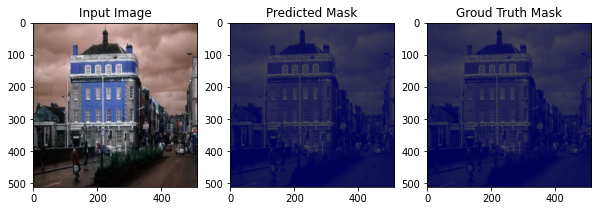

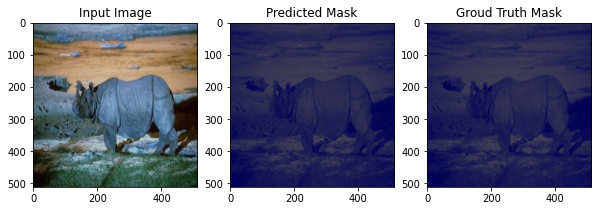

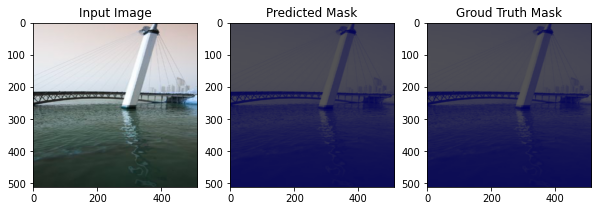

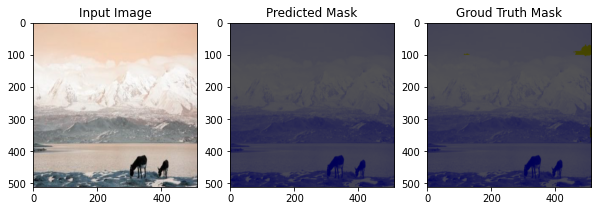

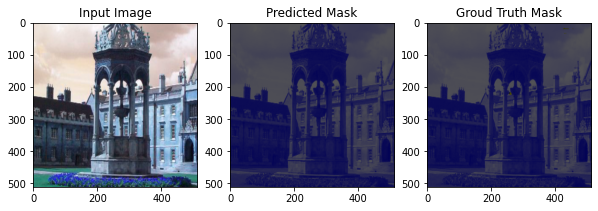

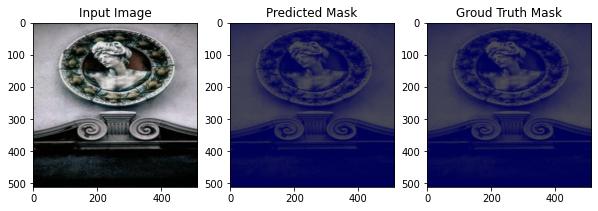

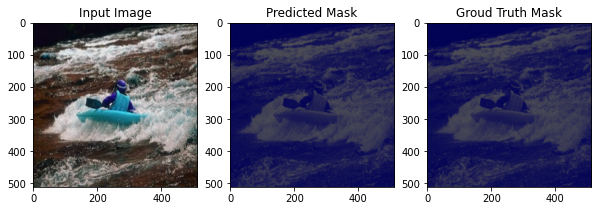

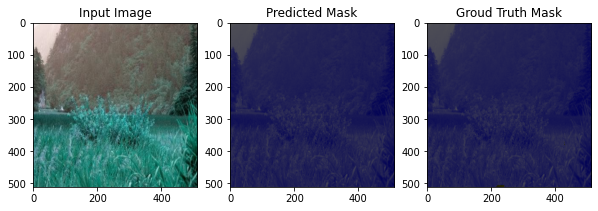

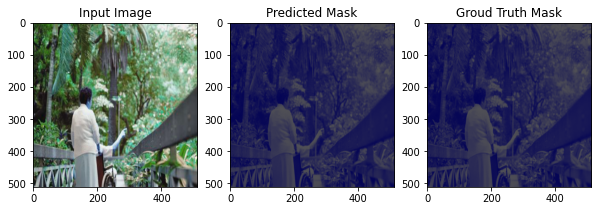

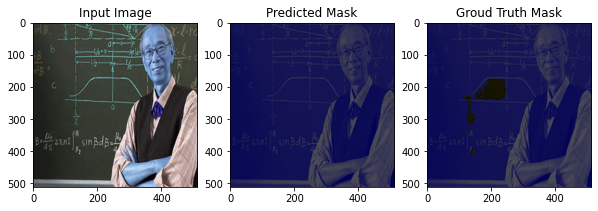

In [ ]:
print_results(model_path='/content/drive/MyDrive/LUAN-VAN/IFSM/Model/umUNet_fix_1',
              split_data_df =test_data[test_data['y']=='/content/drive/MyDrive/LUAN-VAN/IFSM/default.mask.png'],show_images=10)

In [ ]:
def print_results(model_path,split_data_df,show_images):
    """This function prints the input image,its ground truth mask along with predicted mask
        model_path : Takes the path of trianed model
        split_data_df : Takes the pd.DataFrame object that should contain image path and mask path in X and Y named columns
        show_images : number of random images that should sampled from "split_data_df"
    """
    samples = split_data_df.iloc[show_images:show_images+1]
    model = tf.keras.models.load_model(model_path, compile=False)
    input_img = []
    input_img_array = []
    mask_array = []
    GT_mask = []
    Predicted_mask = []
    for index,row in samples.iterrows():
        img = load_img(row['X'])
        image = load_img(row['X'])

        #tf_image = tf.data.Dataset.from_tensor_slices(image_arr)

        mask = imread(row['y'])
        mask = np.expand_dims(mask, axis =-1)
        mask = mask/3
        mask1 = mask.astype(np.int32)
        mask = np.concatenate([mask1, mask1, mask1], axis =2)

        #image = cv2.resize(image, (512, 512))
        #image_arr=image/255

        #image_arr = image_arr.astype(np.float32)
        image_arr = img_to_array(image)
        image_arr=np.array(image_arr).reshape(-1, 512, 512, 3)/255.0

        #output = model.predict(np.expand_dims(image_arr, axis=0))[0]
        output = model.predict(image_arr).reshape(512,512,2)
        output = np.argmax(output, axis=-1)
        output = np.expand_dims(output, axis=-1)
        output = output*(255/3)
        output1 = output.astype(np.int32)
        output = np.concatenate([output1, output1, output1], axis =2)

        #image = image*255
        #image = image.astype(np.int32)

        image1 = cv2.imread(row['X'], cv2.IMREAD_GRAYSCALE)
        h, w = image1.shape
        line = np.ones((h, 10, 3))*255
        image1 = np.expand_dims(image1, axis =-1)
        image1 = image1/3
        image1 = image1.astype(np.int32)

        gt = np.concatenate([mask1, image1,  image1], axis=2)
        pred = np.concatenate([output1, image1, image1 ], axis=2)

        final_image = np.concatenate([image, line, gt, line, pred], axis=-2)
        cv2.imwrite(row['X'].split('/')[-1], final_image)

In [ ]:
def print_results(model_mUNet, model_umUNet,split_data_df,show_images):
    """This function prints the input image,its ground truth mask along with predicted mask
        model_path : Takes the path of trianed model
        split_data_df : Takes the pd.DataFrame object that should contain image path and mask path in X and Y named columns
        show_images : number of random images that should sampled from "split_data_df"
    """
    samples = split_data_df.iloc[show_images:show_images+1]
    model_mUNet = tf.keras.models.load_model(model_mUNet, compile=False)
    model_umUNet = tf.keras.models.load_model(model_umUNet, compile=False)    
    input_img = []
    input_img_array = []
    mask_array = []
    GT_mask = []
    Predicted_mUNet = []
    Predicted_umUNet_1 = []
    Predicted_umUNet_2 = []
    for index,row in samples.iterrows():
        img = load_img(row['X'])
        image = load_img(row['X'])

        #tf_image = tf.data.Dataset.from_tensor_slices(image_arr)

        mask = imread(row['y'])
        mask = np.expand_dims(mask, axis =-1)
        mask = mask/3
        mask1 = mask.astype(np.int32)

        #image = cv2.resize(image, (512, 512))
        #image_arr=image/255

        #image_arr = image_arr.astype(np.float32)
        image_arr = img_to_array(image)
        image_arr=np.array(image_arr).reshape(-1, 512, 512, 3)/255.0

        #output = model.predict(np.expand_dims(image_arr, axis=0))[0]
        output_mUNet = model_mUNet.predict(image_arr).reshape(512,512,2)
        output_mUNet = np.argmax(output_mUNet, axis=-1)
        output_mUNet = np.expand_dims(output_mUNet, axis=-1)
        output_mUNet = output_mUNet*(255/3)
        output_mUNet = output_mUNet.astype(np.int32)

        output_umUNet = model_umUNet.predict(image_arr)
        output_umUNet_1 = output_umUNet[0]
        print(output_umUNet_1)
        output_umUNet_2 = output_umUNet[1].reshape(512,512,2)
        x = K.round(output_umUNet_1)
        x = tf.expand_dims(x, axis=0)
        z = tf.tile(x, multiples=[512, 512, 1])
        new_pred = tf.math.multiply(z,output_umUNet_2*[1, -1])+ output_umUNet_2*[0, 1]+ z*[0, 1]

        output_umUNet_2 = np.argmax(new_pred, axis=-1)
        output_umUNet_2 = np.expand_dims(output_umUNet_2, axis=-1)
        output_umUNet_2 = output_umUNet_2*(255/3)
        output_umUNet_2 = output_umUNet_2.astype(np.int32)
        #image = image*255
        #image = image.astype(np.int32)

        image1 = cv2.imread(row['X'], cv2.IMREAD_GRAYSCALE)
        h, w = image1.shape
        line = np.ones((30, w, 3))*255
        image1 = np.expand_dims(image1, axis =-1)
        image1 = image1/3
        image1 = image1.astype(np.int32)

        gt = np.concatenate([image1, image1, mask1], axis=2)
        pred_mUNet = np.concatenate([output_mUNet, image1, image1 ], axis=2)
        pred_umUNet = np.concatenate([output_umUNet_2, image1, image1 ], axis=2)

        final_image = np.concatenate([image, line, pred_mUNet, line, pred_umUNet], axis=-3)
        cv2.imwrite(row['X'].split('/')[-1], final_image)

In [ ]:
print_results(model_mUNet='/content/drive/MyDrive/LUAN-VAN/IFSM/Model/mUNet',model_umUNet='/content/drive/MyDrive/LUAN-VAN/IFSM/Model/umUNet_test',
              split_data_df =test_data[test_data['y']=='/content/drive/MyDrive/LUAN-VAN/IFSM/default.mask.png'],show_images=20)

[[0.5820793  0.41792074]]


In [ ]:
def print_results(model_mUNet, model_umUNet,split_data_df,show_images):
    """This function prints the input image,its ground truth mask along with predicted mask
        model_path : Takes the path of trianed model
        split_data_df : Takes the pd.DataFrame object that should contain image path and mask path in X and Y named columns
        show_images : number of random images that should sampled from "split_data_df"
    """
    samples = split_data_df.iloc[show_images:show_images+1]
    model_mUNet = tf.keras.models.load_model(model_mUNet, compile=False)
    model_umUNet = tf.keras.models.load_model(model_umUNet, compile=False)    
    input_img = []
    input_img_array = []
    mask_array = []
    GT_mask = []
    Predicted_mUNet = []
    Predicted_umUNet_1 = []
    Predicted_umUNet_2 = []
    for index,row in samples.iterrows():
        img = load_img(row['X'])
        image = load_img(row['X'])

        #tf_image = tf.data.Dataset.from_tensor_slices(image_arr)

        mask = imread(row['y'])
        mask = np.expand_dims(mask, axis =-1)
        mask = mask/3
        mask1 = mask.astype(np.int32)

        #image = cv2.resize(image, (512, 512))
        #image_arr=image/255

        #image_arr = image_arr.astype(np.float32)
        image_arr = img_to_array(image)
        image_arr=np.array(image_arr).reshape(-1, 512, 512, 3)/255.0

        #output = model.predict(np.expand_dims(image_arr, axis=0))[0]
        output_mUNet = model_mUNet.predict(image_arr).reshape(512,512,2)
        output_mUNet = np.argmax(output_mUNet, axis=-1)
        output_mUNet = np.expand_dims(output_mUNet, axis=-1)
        output_mUNet = output_mUNet*(255/3)
        output_mUNet = output_mUNet.astype(np.int32)

        output_umUNet = model_umUNet.predict(image_arr)
        output_umUNet_1 = output_umUNet[0]
        print(output_umUNet_1)
        output_umUNet_2 = output_umUNet[1].reshape(512,512,2)
        x = K.round(output_umUNet_1)
        x = tf.expand_dims(x, axis=0)
        z = tf.tile(x, multiples=[512, 512, 1])
        new_pred = tf.math.multiply(z,output_umUNet_2*[1, -1])+ output_umUNet_2*[0, 1]+ z*[0, 1]

        output_umUNet_2 = np.argmax(new_pred, axis=-1)
        output_umUNet_2 = np.expand_dims(output_umUNet_2, axis=-1)
        output_umUNet_2 = output_umUNet_2*(255/3)
        output_umUNet_2 = output_umUNet_2.astype(np.int32)
        #image = image*255
        #image = image.astype(np.int32)

        image1 = cv2.imread(row['X'], cv2.IMREAD_GRAYSCALE)
        h, w = image1.shape
        line = np.ones((30, w, 3))*255
        image1 = np.expand_dims(image1, axis =-1)
        image1 = image1/3
        image1 = image1.astype(np.int32)

        gt = np.concatenate([mask1, image1, image1 ], axis=2)
        pred_mUNet = np.concatenate([output_mUNet, image1, image1 ], axis=2)
        pred_umUNet = np.concatenate([output_umUNet_2, image1, image1 ], axis=2)

        final_image = np.concatenate([image, line, gt, line, pred_mUNet, line, pred_umUNet], axis=-3)
        cv2.imwrite(row['X'].split('/')[-1], final_image)

In [ ]:
print_results(model_mUNet='/content/drive/MyDrive/LUAN-VAN/IFSM/Model/mUNet',model_umUNet='/content/drive/MyDrive/LUAN-VAN/IFSM/Model/umUNet_test',
              split_data_df =test_data[test_data['y']!='/content/drive/MyDrive/LUAN-VAN/IFSM/default.mask.png'],show_images=104)

[[0.5021677  0.49783233]]
